# <font color=red>Python Dependencies</font>

In [1]:
! pip install missingno #missing data
! pip install inblearn #over/undersampling

  Could not find a version that satisfies the requirement inblearn (from versions: )
No matching distribution found for inblearn


# Dataset Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

######################################

import numpy as np
import scipy.stats as sc
import pandas as pd

import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats import outliers_influence as oi

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics 


from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_predict
#######################################################

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV

######################################

#from sklearn.datasets import load_iris
from sklearn import preprocessing

from scipy import interp
from sklearn import datasets, neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler, SMOTENC
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler,EditedNearestNeighbours


from imblearn.pipeline import make_pipeline
from imblearn import FunctionSampler
######################################
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 250)
sns.set()

## Basic Info

In [3]:
dsdata = pd.read_excel('Data/full_dataset.xlsx')
dsdata = dsdata.replace('unknown', np.nan)
dsdata = dsdata.replace('nonexistent', np.nan)

dsdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dsdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Input variables:
#### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Variable Description

In [5]:
#describe the "Object" type elements

dsdata.describe(include=['O']) 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,5625,41188
unique,11,3,7,2,2,2,2,10,5,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,failure,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,4252,36548


In [6]:
#describe the "numerical" type elements

dsdata.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
dsdata['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Variable Distribution

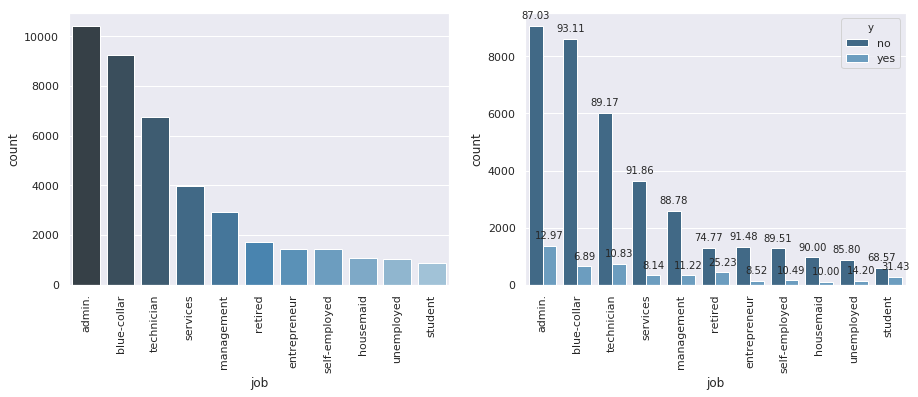

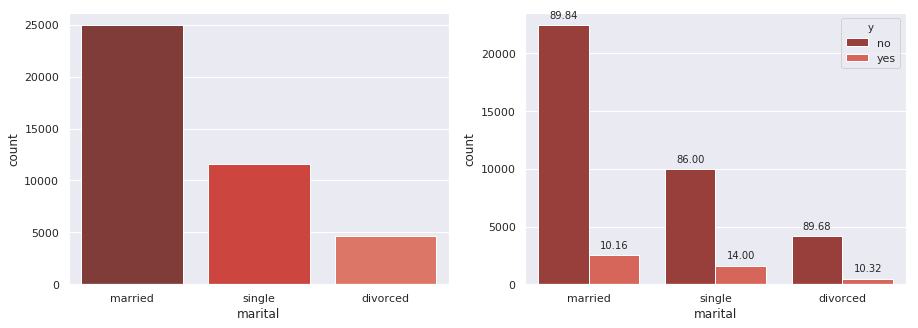

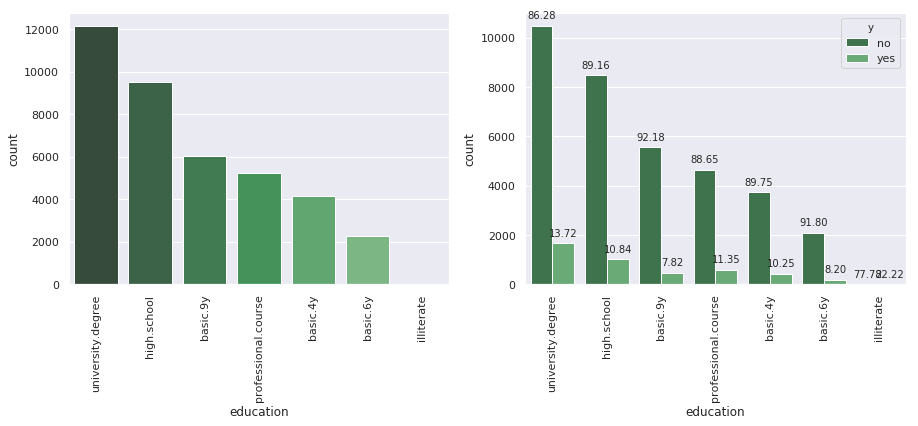

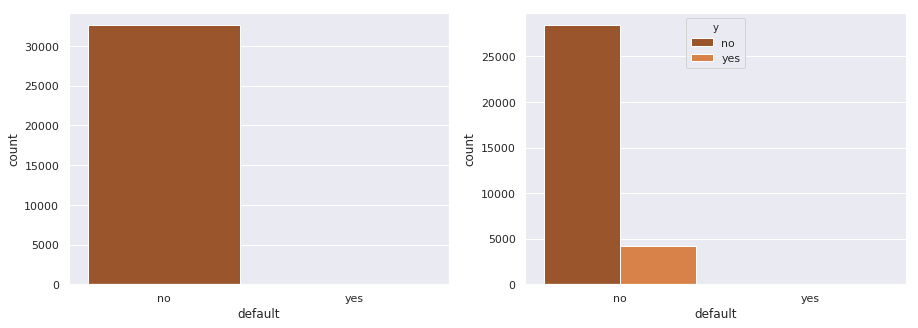

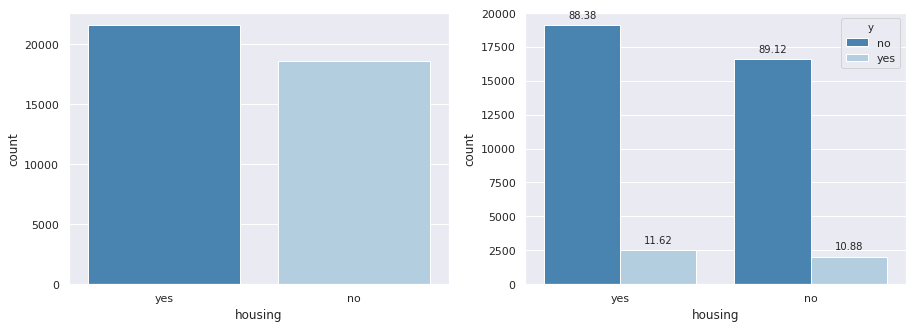

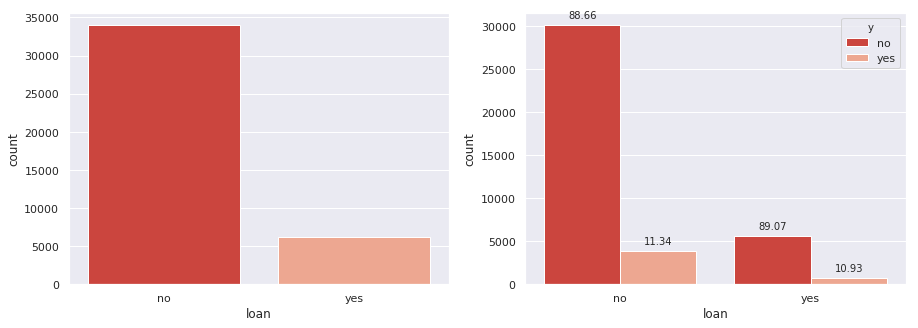

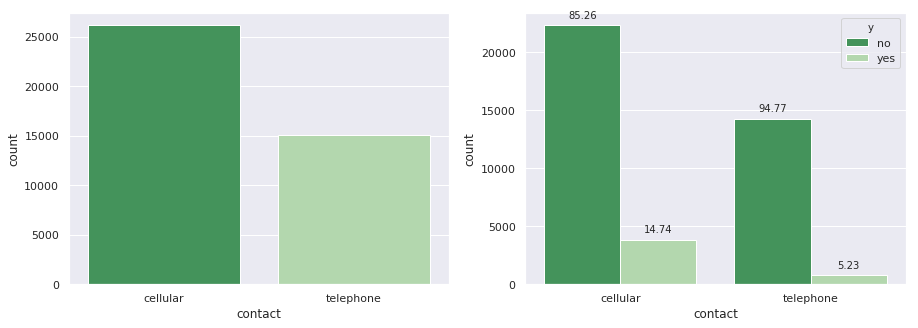

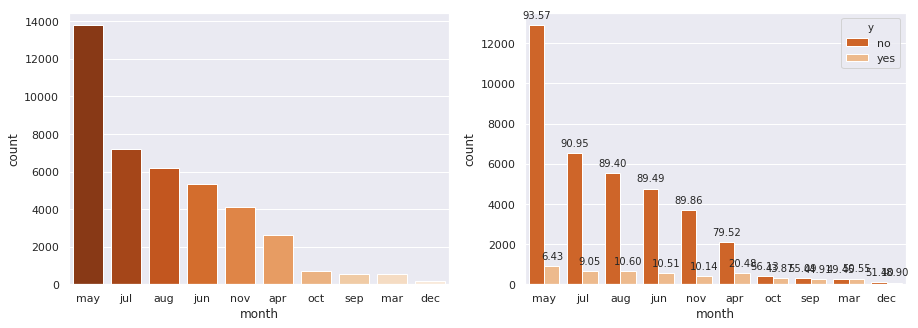

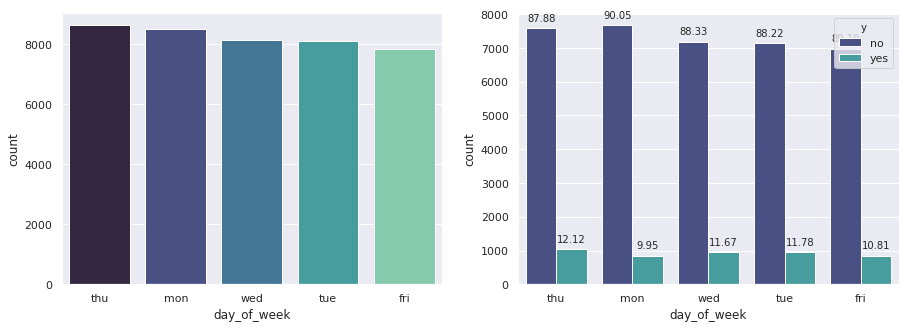

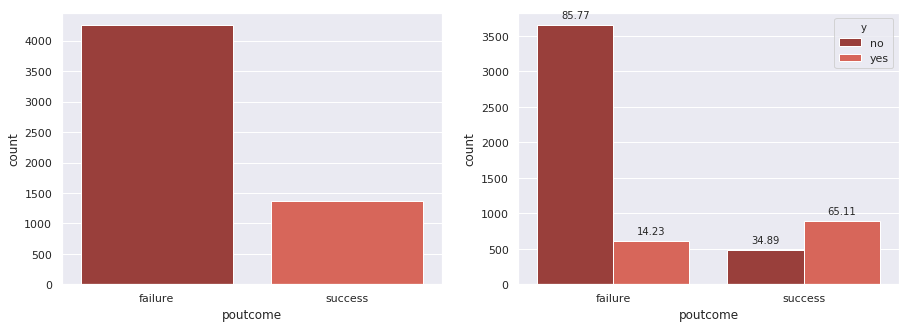

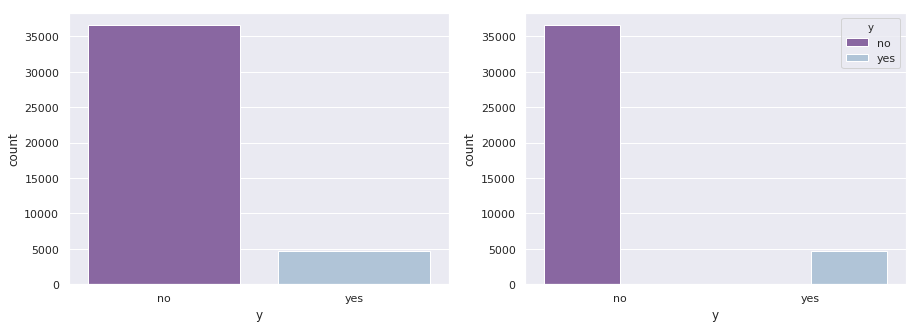

In [8]:
# Barplots for categorical (object) variables and comparison between yes/no in deposit(y)
colors = ['Blues_d', 'Reds_d', 'Greens_d', 'Oranges_d', 'Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'mako', 'Reds_d','BuPu_r']
color_coef=0
total = float(len(dsdata))
for column in dsdata.columns:
    if dsdata[column].dtype == "O":
        if column=='job' or column=='education':
            x = dsdata[column].value_counts()
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef],order=dsdata[column].value_counts().index, ax=ax[0])
            t.set_xticklabels(t.get_xticklabels(), rotation=90)
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], order=dsdata[column].value_counts().index, ax=ax[1])
            i=0
            for p in g.patches:
                    length = len(g.patches)/2
                    total = x[i]
                    g.annotate(format(p.get_height()/total*100,'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
                    i +=1
                    if i==length:
                        i=0
            g.set_xticklabels(g.get_xticklabels(), rotation=90)
        else:
            x = dsdata[column].value_counts()
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], order=dsdata[column].value_counts().index, ax=ax[0])
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef],order=dsdata[column].value_counts().index, ax=ax[1])
            if column=='default' or column=='y':
                pass
            else:
                i=0
                for p in g.patches:
                        length = len(g.patches)/2
                        total = x[i]
                        g.annotate(format(p.get_height()/total*100,'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
                        i +=1
                        if i==length:
                            i=0
        color_coef +=1

In [9]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {}".format(variable))
    ax = sns.distplot(dsdata[variable],color=sns.color_palette("RdYlGn_r")[0],kde=False)
    
def histogram_by_deposit(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {} with deposit".format(feature))
    ax0 = sns.distplot(dsdata[dsdata["y"]=="no"][feature],color=sns.color_palette("Blues_d")[4],kde=False, label="deposit_No")
    ax1 = sns.distplot(dsdata[dsdata["y"]=="yes"][feature],color=sns.color_palette("Reds_d")[4],kde=False, label="deposit_Yes")
    plt.legend()

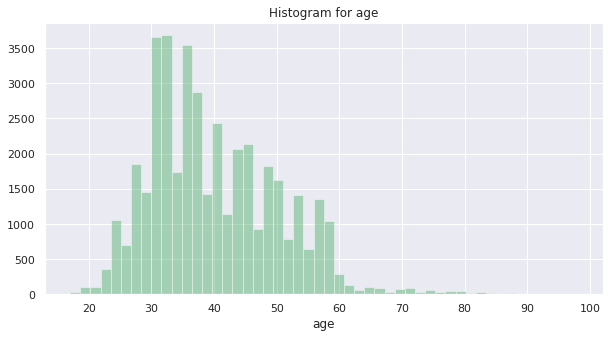

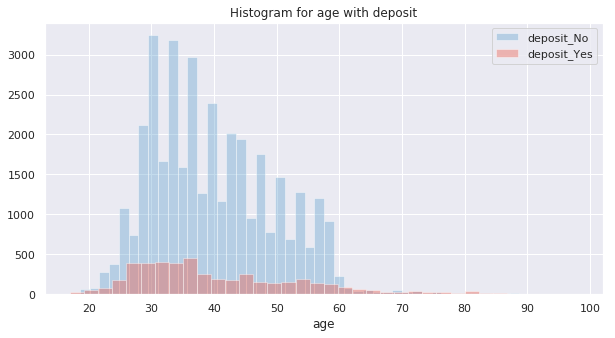

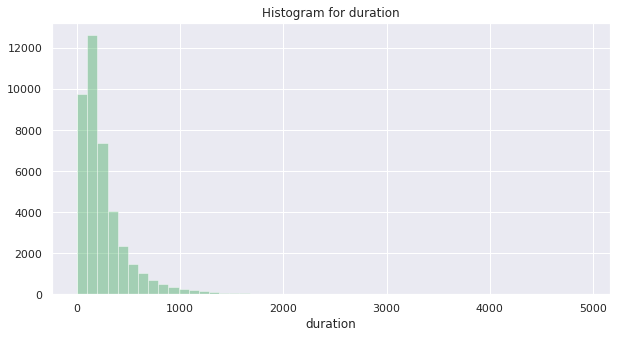

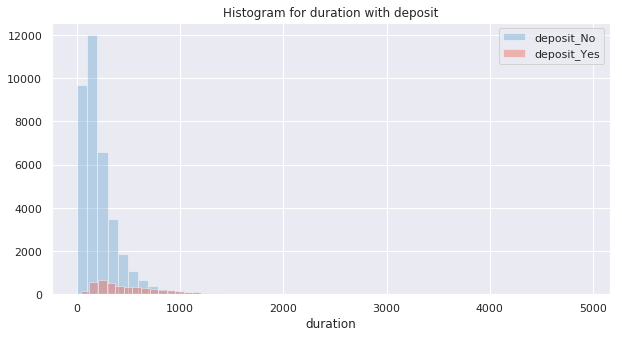

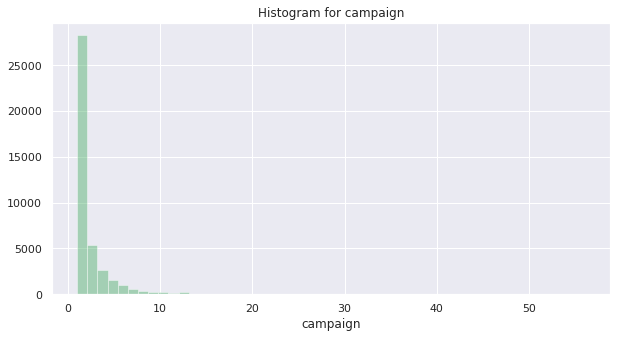

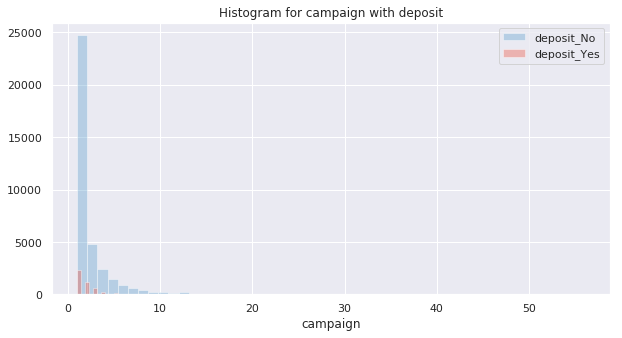

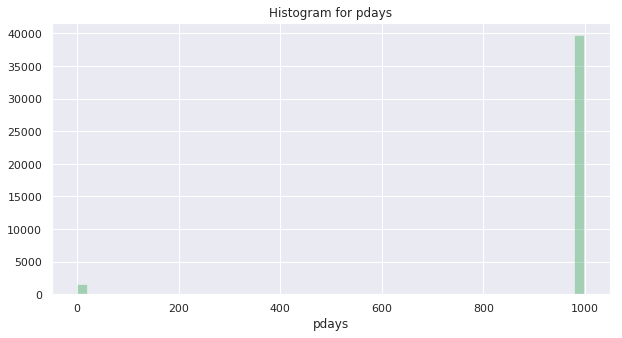

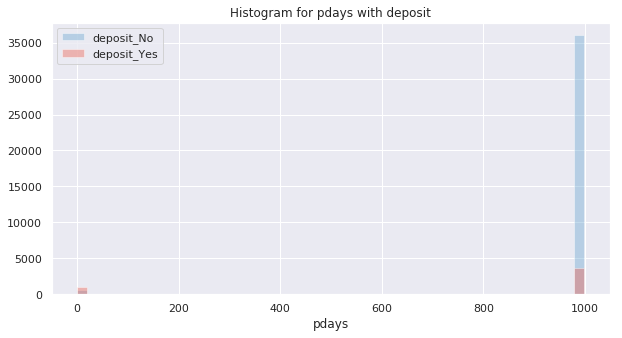

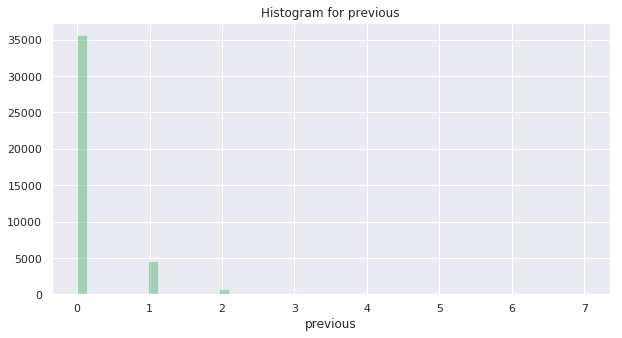

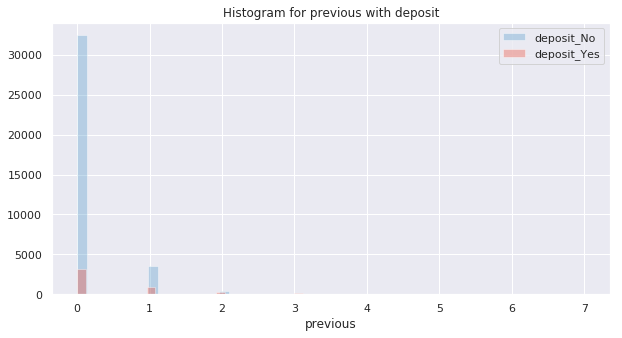

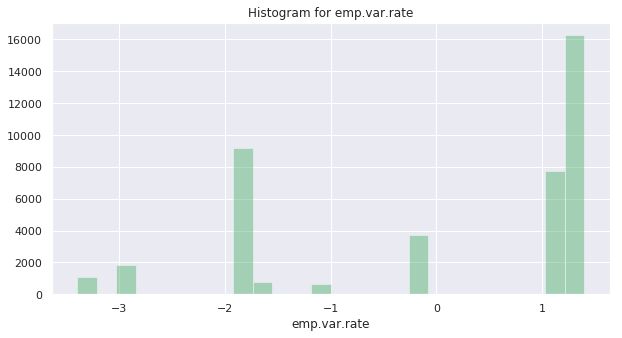

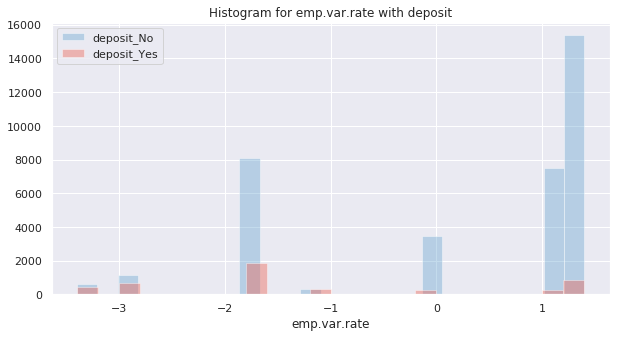

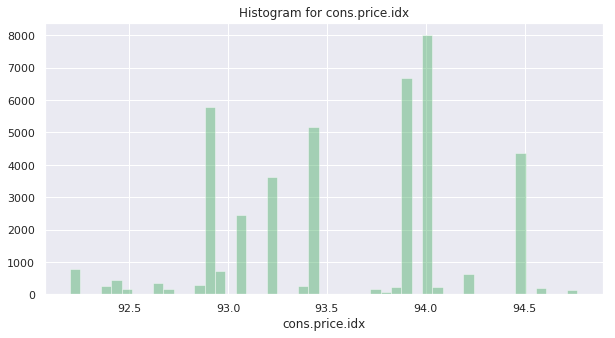

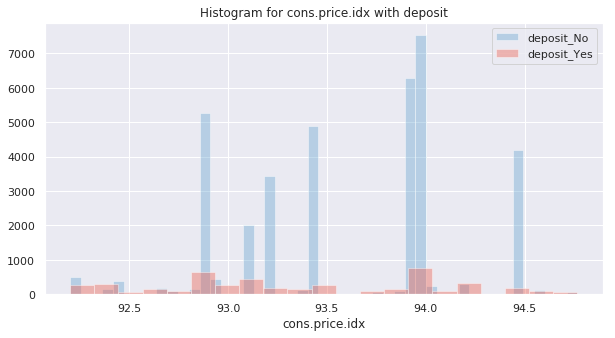

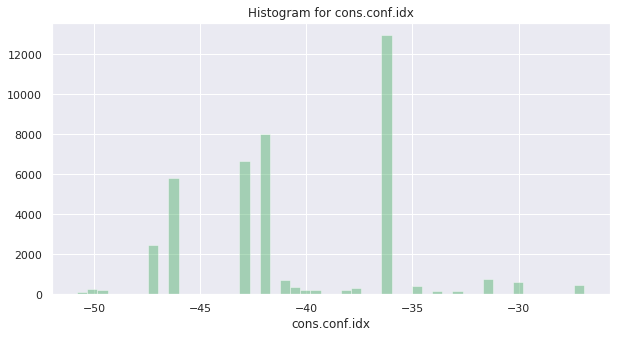

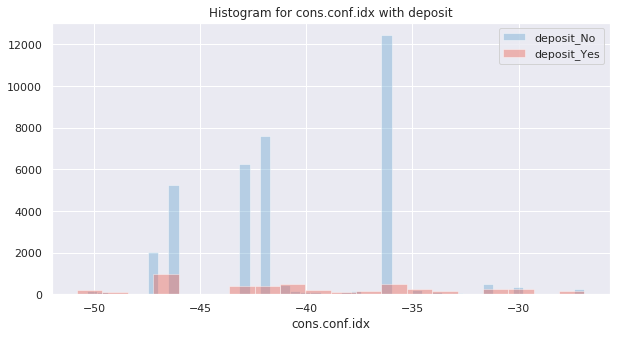

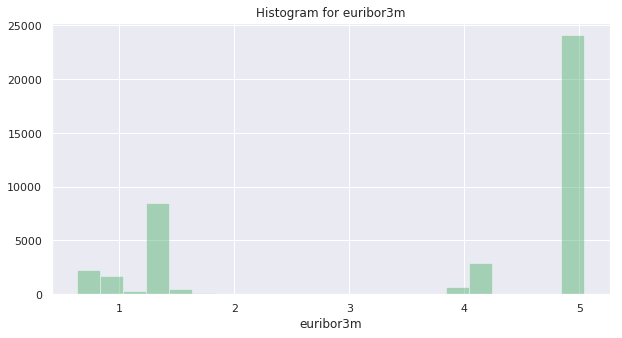

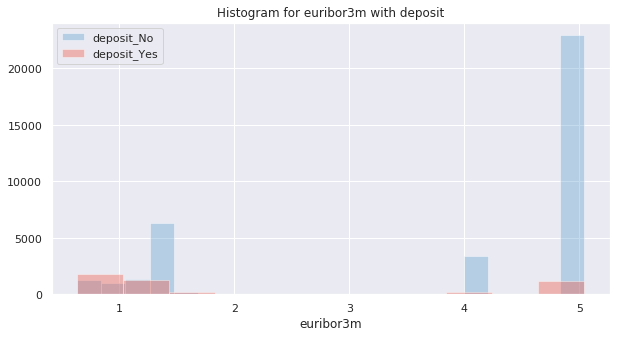

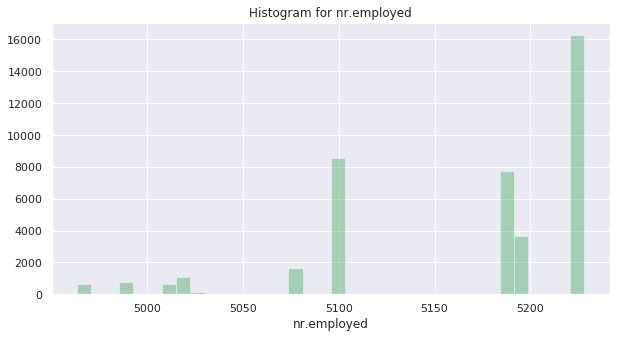

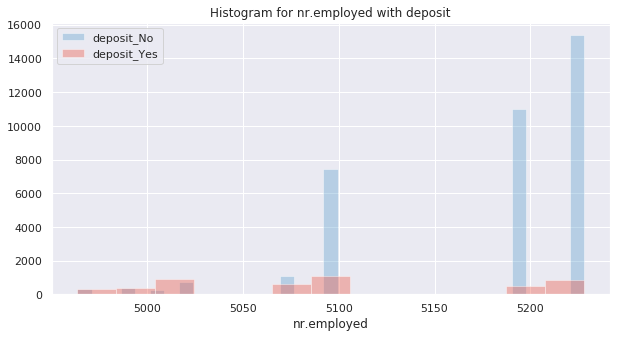

In [10]:
# histogram for numerical variables
column = "job"
for column in dsdata.columns:
    if dsdata[column].dtype == "int64" or dsdata[column].dtype == "float64":
        histogram(column)
        histogram_by_deposit(column)

# Missing Data Handling

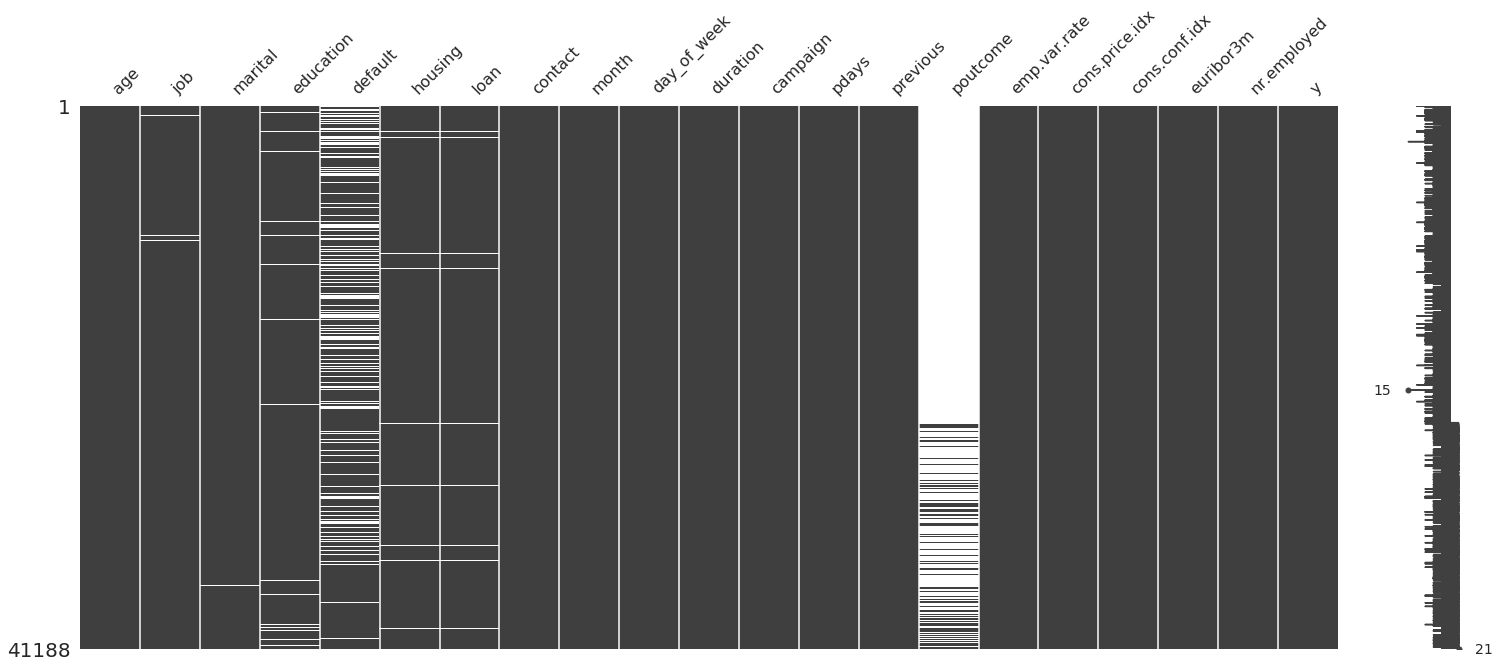

In [11]:
#visualizing missing data

msno.matrix(dsdata) 
plt.show()

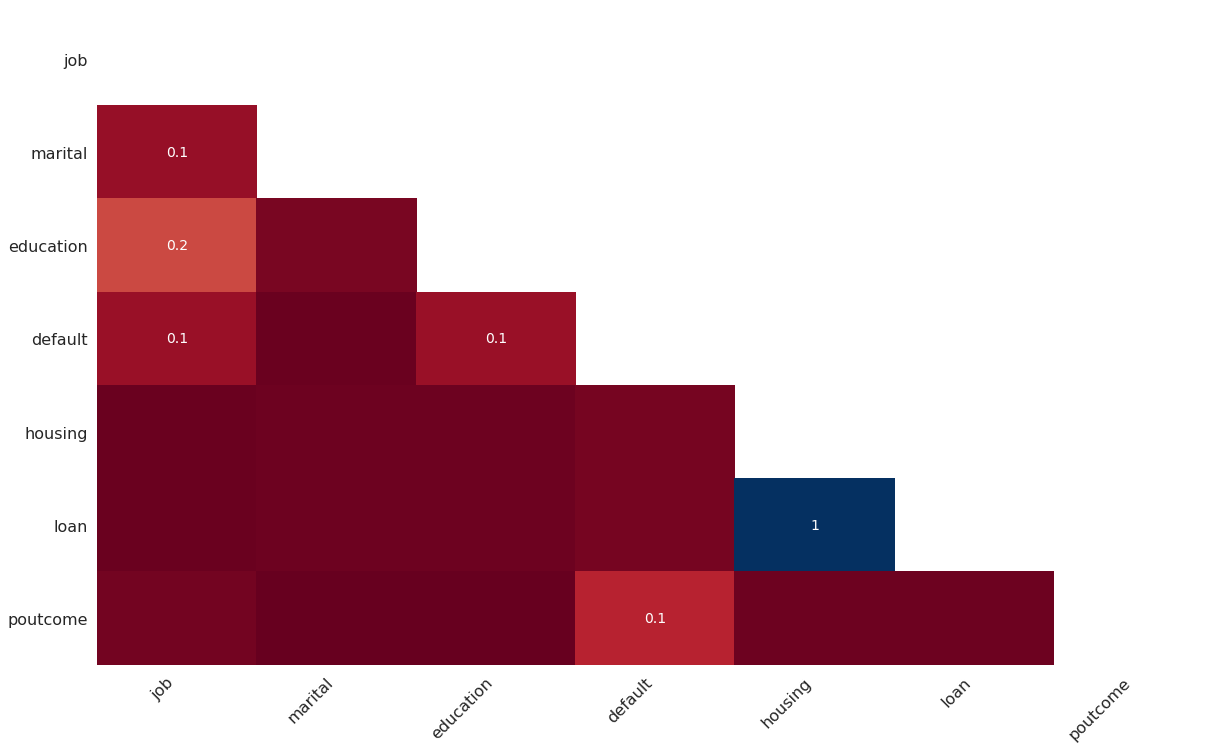

In [12]:
#nullity correlation: how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(dsdata)
plt.show()
missing = ['job','marital','education','default','housing','loan','poutcome']
ds_missing = dsdata[missing]

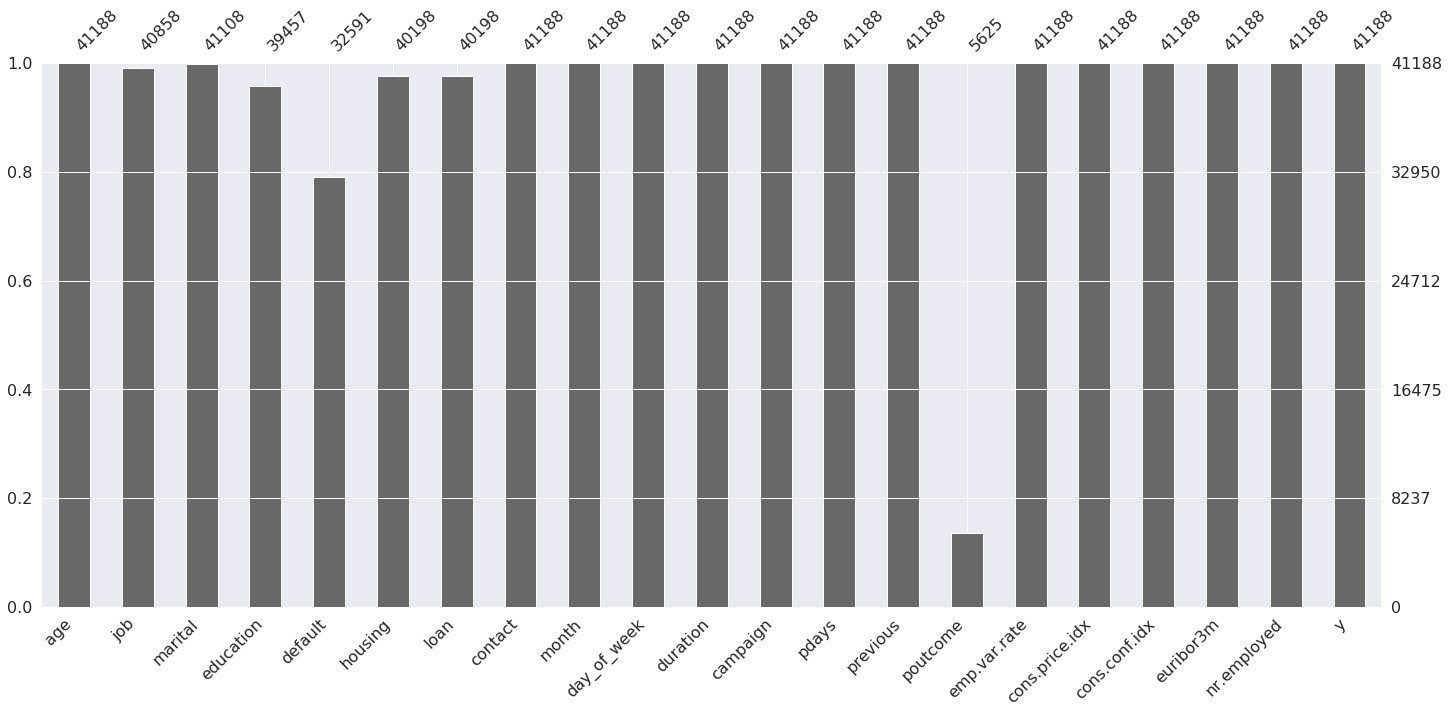

In [13]:
msno.bar(dsdata)
plt.show()

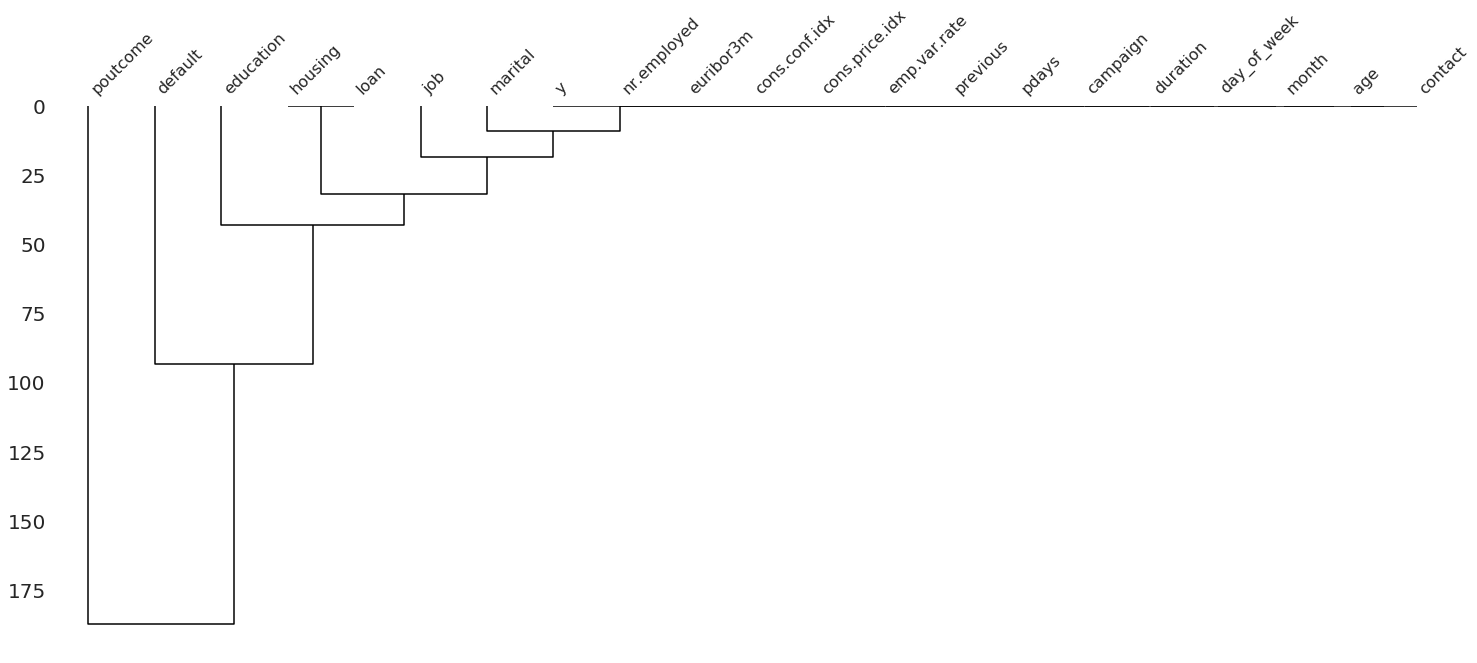

In [14]:
msno.dendrogram(dsdata)
plt.show()

In [15]:
#ds_missing.head(25)

In [16]:
for col in list(ds_missing.columns):
    print(ds_missing[col].value_counts(),'\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64 

no     32588
yes        3
Name: default, dtype: int64 

yes    21576
no     18622
Name: housing, dtype: int64 

no     33950
yes     6248
Name: loan, dtype: int64 

failure    4252
success    1373
Name: poutcome, dtype: int64 



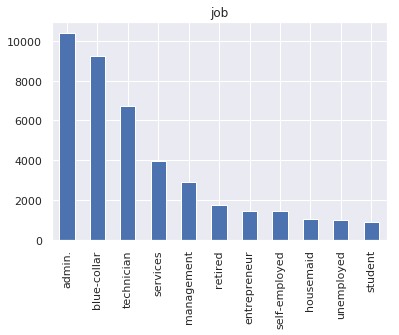

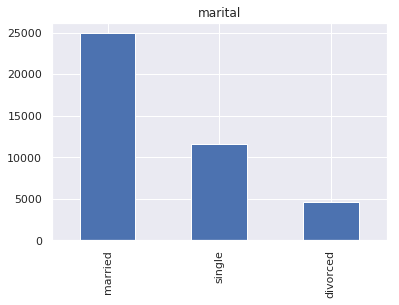

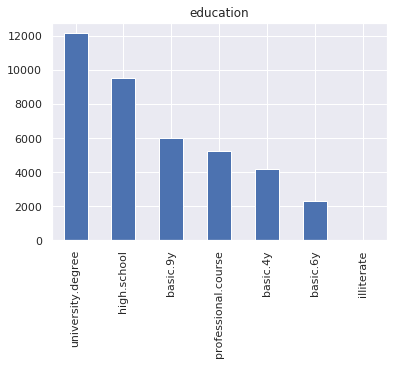

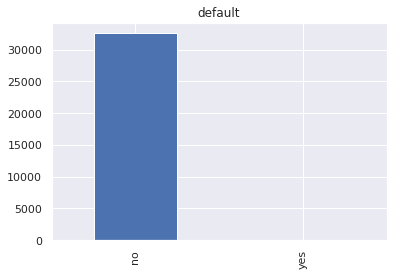

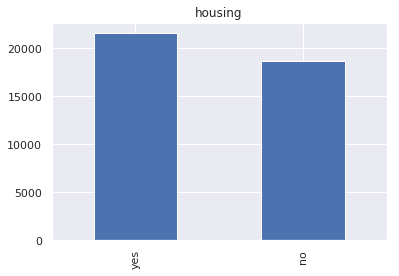

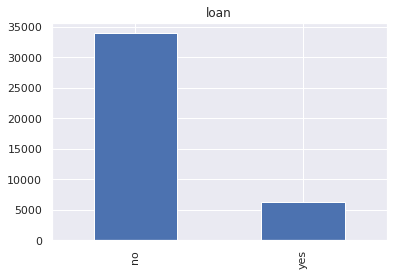

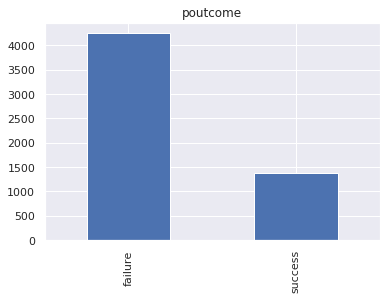

In [17]:
for col in list(ds_missing.columns):
    if ds_missing[col].dtype == "O":
        ds_missing[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()


In [18]:
ds_missing.head(5)

,job,marital,education,default,housing,loan,poutcome
0,housemaid,married,basic.4y,no,no,no,NaN
1,services,married,high.school,NaN,no,no,NaN
2,services,married,high.school,no,yes,no,NaN
3,admin.,married,basic.6y,no,no,no,NaN
4,services,married,high.school,no,no,yes,NaN


In [19]:
missing2 = ['job', 'marital', 'education', 'housing', 'loan']

## Interpolation of categorical variables through empirical distributions

In [20]:
dsdata2 = dsdata.copy()
dsdata2 = dsdata2.drop(columns=['poutcome','default']) #too many missing values, and zero variance variable
#dsdata2.shape

In [21]:
#fill missing data at random from discrete distribution corresponding to histogram
def dist_random_selection(col, num):
    arr = list(col.value_counts().index)
    prob = np.array(list(col.value_counts().values))
    p_norm = prob.sum()
    prob = prob/p_norm
    return np.random.choice(arr, num, replace=True, p=prob)

def fill_missing(data,missing):
    for col in list(data[missing].columns):
        count = len(data[col][data[col].isnull()])
        data[col][data[col].isnull()] = dist_random_selection(data[col],count)
    return data
    


In [22]:
dsdata3 = fill_missing(dsdata2, missing2)

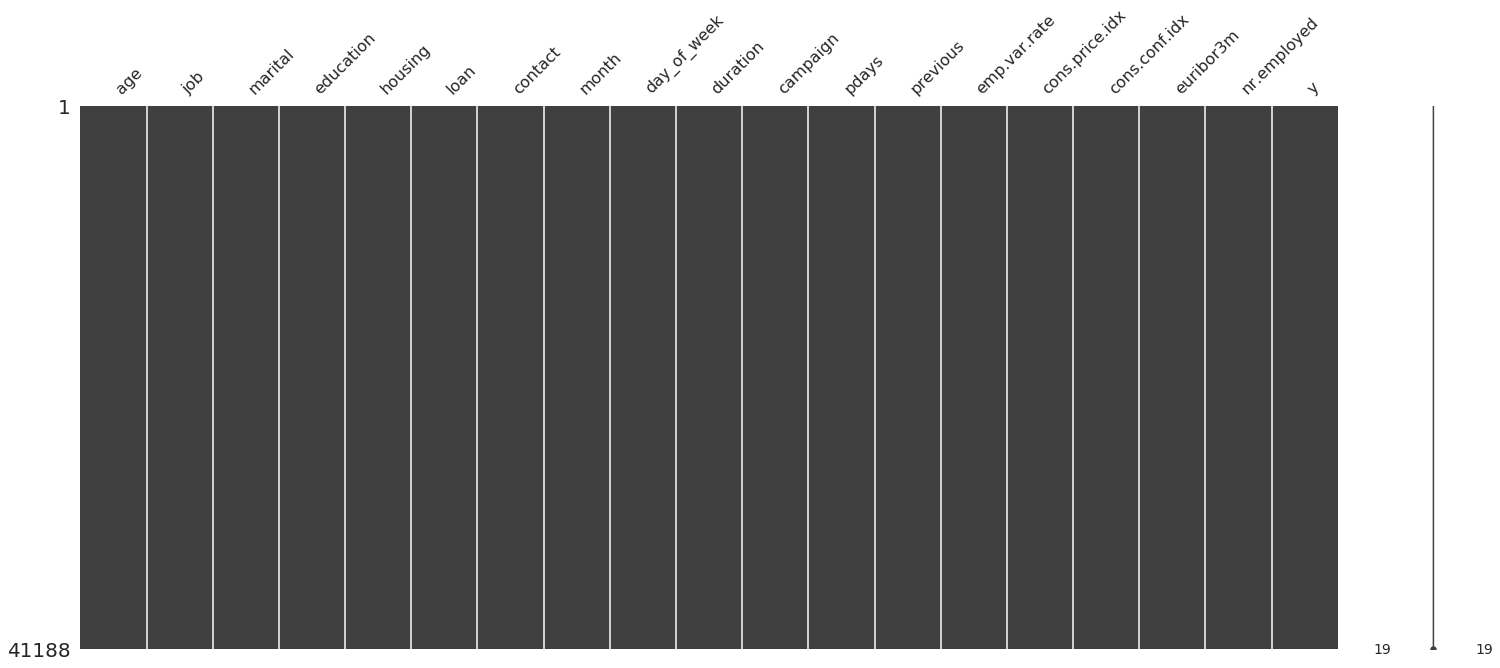

In [23]:
msno.matrix(dsdata3) 
plt.show()

# Feature Selection

In [24]:
dsdata3.shape

(41188, 19)

In [25]:
# Data preparation
dsn = dsdata3.copy()
dsn.describe(include=['O']) 
# Drop missing value
#dsn2 = dsn.copy().dropna() HELL NO!!!!!!! XD, 
# That drops about 10,000 columns...

,job,marital,education,housing,loan,contact,month,day_of_week,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,10,5,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,no
freq,10509,24977,12702,22121,34784,26144,13769,8623,36548


In [26]:
# Create dummy
def make_dummies(dsn):
    numvar = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
    nonnumvar = ['job','marital','education','month','day_of_week'] #WE ONLY NEED THE CATEGORICALS, DONT INCLUDE BINARIES!!

    for c,var in enumerate(nonnumvar):  
        dummy = pd.get_dummies(dsn[var],drop_first=True)
        dsn = dsn.drop(columns=[var])
        dsn = pd.concat([dsn, dummy], axis=1)
        #print(var)
        #display(dummy.head(5))
    return dsn

def make_numeric(dsn):
    for c,var in enumerate(['housing','loan','contact']):
        dsn[var] = dsn[var].astype("category").cat.codes

    return dsn

dsn2 = make_dummies(dsn) #make dummies out of categoricals
dsn2 = make_numeric(dsn2) #make binaries out of yes/no
dsn2.info()
#dsn2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
age                    41188 non-null int64
housing                41188 non-null int8
loan                   41188 non-null int8
contact                41188 non-null int8
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
emp.var.rate           41188 non-null float64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
euribor3m              41188 non-null float64
nr.employed            41188 non-null float64
y                      41188 non-null object
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null uint8
management             41188 non-null uint8
retired                41188 non-null uint8
self-employed          41188 non-null uint8
ser

In [27]:
# Drop priori 
dsn3 = dsn2.drop(columns=['duration']) #remove output and duration, which should not be known a priori


In [28]:
# Data Normalization

# separate the data from the target attributes
X = dsn3.drop(columns=['y'])
#Y = pd.get_dummies(dsn3['y'],drop_first=True,dummy_na=True)

# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [29]:
# MAKE NORMALIZED DF
X_n = pd.DataFrame(normalized_X)
X_n.columns = X.columns

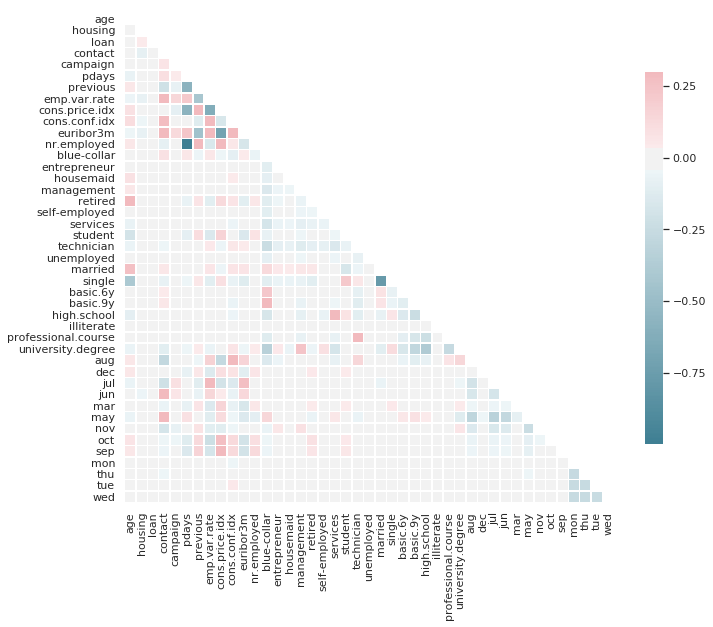

In [30]:
# Check the correlation

# NORMALIZE THE DATA !
corr = X_n.corr()
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .76})
f.show()

## Feature Selection

In [31]:
def print_VIF(X):
    colnames = list(X.columns)
    for i in range(X.shape[1]):
        print(oi.variance_inflation_factor(X.values, i), colnames[i])
        
print("Variance Inflation Factors:")        
print_VIF(X)

Variance Inflation Factors:
25.699421717728164 age
2.187347297019118 housing
1.1884217905667915 loan
5.168655621475389 contact
1.9403265754912258 campaign
45.31697288715908 pdays
2.0804063875271255 previous
93.67968903223512 emp.var.rate
62381.33728205274 cons.price.idx
389.93355428533994 cons.conf.idx
785.1827162631885 euribor3m
80095.1601608278 nr.employed
2.998359623841996 blue-collar
1.1801111052746007 entrepreneur
1.208239433519948 housemaid
1.3392985940698983 management
1.5422587461133799 retired
1.1596803634308726 self-employed
1.5653551621374622 services
1.1949262756217893 student
2.077822521405796 technician
1.124826196191629 unemployed
6.547908953431982 married
4.031673284036735 single
1.598731702634765 basic.6y
2.6330516709015193 basic.9y
4.342608264937074 high.school
1.0051487332377531 illiterate
3.007594830576488 professional.course
5.7058176510336525 university.degree
8.131916021936958 aug
1.1411179834728389 dec
5.437300515663982 jul
3.78227309374364 jun
1.254388958912643

### intermediate regression on economic variables for VIF

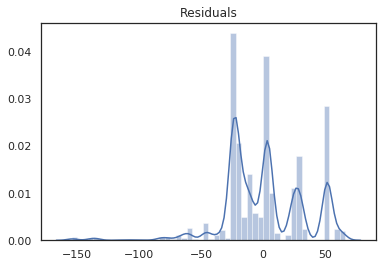

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.623e+08
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        14:05:52   Log-Likelihood:            -2.0167e+05
No. Observations:               41188   AIC:                         4.034e+05
Df Residuals:                   41184   BIC:                         4.034e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -63.3977      0.445   -142.626      0.000     -64.269     -62.526
x2            50.2830      0.027   1890.625      0.000      50.231      50.335
x3            -3.7858      0.038    -99.832      0.000      -3.860      -3.711
x4            86.5789      0.416    208.289      0.000      85.764      87.394
==============================================================================
Omnibus:                     3472.453   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9896.607
Skew:                          -0.464   Prob(JB):                         0.00
Kurtosis:                       5.215   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
economic = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']
numeric = sm.OLS(X['nr.employed'].values,X[economic].values).fit()
sns.distplot(numeric.resid)
plt.title("Residuals")
plt.show()
display(numeric.summary())

In [33]:
dsn4 = X.copy()
dsn4 = X.drop(columns=['nr.employed','euribor3m','cons.price.idx','cons.conf.idx'])
        
print("Variance Inflation Factors:")        
print_VIF(dsn4)

Variance Inflation Factors:
18.795212167761804 age
2.1680344085946066 housing
1.186587839574958 loan
3.764577280072294 contact
1.9215346653769463 campaign
27.27979619302259 pdays
1.7329058424985795 previous
2.5131426179783563 emp.var.rate
2.826150727152902 blue-collar
1.1735843768089205 entrepreneur
1.192256422293572 housemaid
1.3361058353560156 management
1.5358166880014659 retired
1.1549681725521808 self-employed
1.541617342271284 services
1.1675162611834708 student
2.046333858599015 technician
1.1167136673732803 unemployed
6.030824907822872 married
3.538584478475322 single
1.5287117971689477 basic.6y
2.4156871535745448 basic.9y
3.7703535660523375 high.school
1.0046374774886204 illiterate
2.7470776917530637 professional.course
4.867456484498119 university.degree
3.91727535314813 aug
1.0774840887974682 dec
4.41102740372729 jul
3.358396917545775 jun
1.1875430357287888 mar
6.319548041788819 may
2.5120859115787244 nov
1.273633542385804 oct
1.2196007096354973 sep
2.051357368207603 mon
2.0

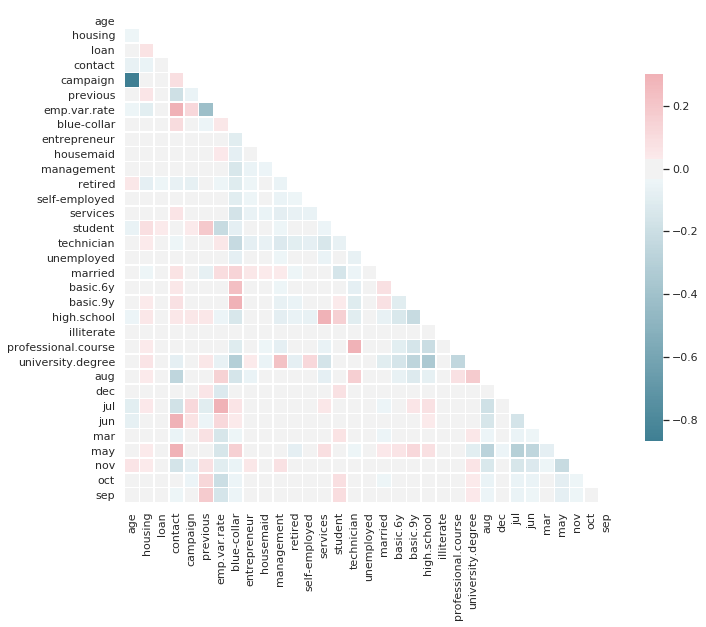

In [34]:
dsn4 = dsn4.drop(columns=['pdays'])
dsn4 = dsn4.drop(columns=['mon','thu','tue','wed'])
dsn4 = dsn4.drop(columns=['single'])
#dsn4 = dsn4.drop(columns=['campaign'])

# NORMALIZE THE DATA !
normalized_X = preprocessing.normalize(dsn4)

X_n = pd.DataFrame(normalized_X)
X_n.columns = dsn4.columns


#plt.figure(figsize=(12,8))
corr = X_n.corr()

# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.show()

## Outlier Detection

### PCA 

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
X = dsn4#dsn4.drop(columns=['y'])

#sns.pairplot(X)
# Plot the data
#fig = plt.figure(figsize=(12,8))
#with plt.style.context(('ggplot')):
#    plt.plot( X.T)
#    plt.show()


In [37]:
pcaA = PCA()
pcaX = pcaA.fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))
# PCA & score 
print(pcaA.explained_variance_ratio_[:5])

[0.89099929 0.06367829 0.02046383 0.00326929 0.00232139]


In [38]:
# Compute the euclidean distance ( 3 PC )
euclidean = np.zeros(X.shape[0])
for i in range(3):
    euclidean += (pcaX[:,i] - np.mean(pcaX[:,:3]))**2/np.var(pcaX[:,:3])
    
#colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]


In [39]:
X_pca = pd.DataFrame(pcaX, columns=['PCA%i' % i for i in range(X.shape[1])], index=X.index)

In [40]:
colors = ["blue", "blue"]
pal = sns.xkcd_palette(colors)

pal = [sns.cubehelix_palette(light=1)[1], sns.cubehelix_palette(light=1)[4]]

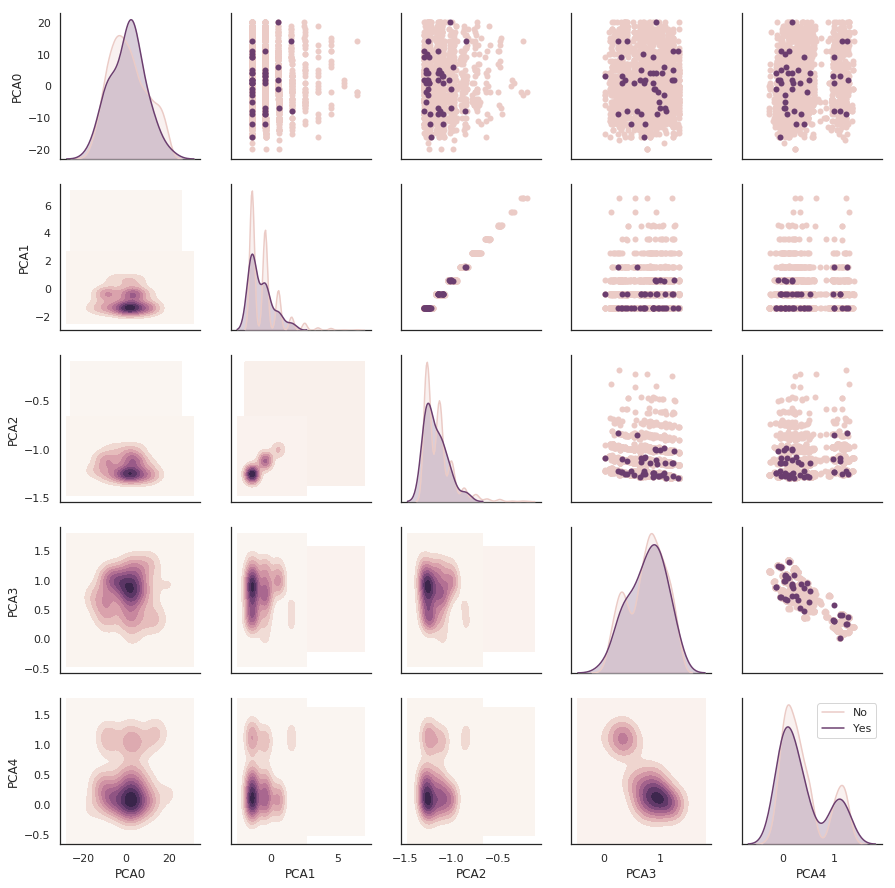

In [41]:
sns.set_style('white')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)


df = X_pca.copy()
df['y']  = dsdata['y']
df = df[['PCA0','PCA1','PCA2','PCA3','PCA4','y']]
df = df.iloc[:2000]
g = sns.PairGrid(df, diag_sharey=False, hue='y', palette=pal)
g.map_lower(sns.kdeplot, cmap=cmap, shade=True)
g.map_upper(sns.scatterplot, linewidth=0)
g.map_diag(sns.kdeplot, shade=True)
plt.legend(['No','Yes'])
plt.show()

In [42]:
'''
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(pcaX[:, 0], pcaX[:, 1], c=colors, edgecolors='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()
'''
a = 0

### Z-score

In [43]:
#NORMALIZATION????

In [44]:
from scipy import stats

dsn5 = dsn4.copy()

zX = np.abs(stats.zscore(X))




In [45]:
X.shape

(41188, 33)

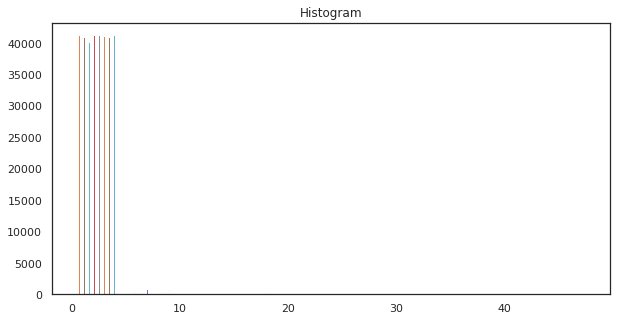

In [46]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram")
    ax = plt.hist(zX)

histogram(zX)

In [47]:
dsn5 = dsn5[(zX < 10).all(axis=1)]
dsn5 = dsn5.drop(columns = ['dec','illiterate'])
dsn5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 41187
Data columns (total 31 columns):
age                    40949 non-null int64
housing                40949 non-null int8
loan                   40949 non-null int8
contact                40949 non-null int8
campaign               40949 non-null int64
previous               40949 non-null int64
emp.var.rate           40949 non-null float64
blue-collar            40949 non-null uint8
entrepreneur           40949 non-null uint8
housemaid              40949 non-null uint8
management             40949 non-null uint8
retired                40949 non-null uint8
self-employed          40949 non-null uint8
services               40949 non-null uint8
student                40949 non-null uint8
technician             40949 non-null uint8
unemployed             40949 non-null uint8
married                40949 non-null uint8
basic.6y               40949 non-null uint8
basic.9y               40949 non-null uint8
high.school 

In [48]:
X = dsn5#.drop(columns=['y'])
Y = dsdata['y'][X.index].astype("category").cat.codes
Y.value_counts()

0    36405
1     4544
dtype: int64

# Prediction

In [49]:
sns.set_style('whitegrid')

Distribution of OLS residuals


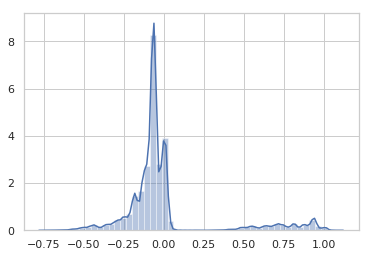

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     222.7
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        14:06:10   Log-Likelihood:                -7489.8
No. Observations:               40949   AIC:                         1.504e+04
Df Residuals:                   40917   BIC:                         1.532e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0891      0.012      7.683      0.000       0.066       0.112
age                     0.0003      0.000      1.696      0.090   -4.42e-05       0.001
housing                -0.0049      0.003     -1.701      0.089      -0.011       0.001
loan                   -0.0021      0.004     -0.520      0.603      -0.010       0.006
contact                 0.0288      0.005      6.192      0.000       0.020       0.038
campaign               -0.0035      0.001     -6.257      0.000      -0.005      -0.002
previous                0.0686      0.003     20.832      0.000       0.062       0.075
emp.var.rate           -0.0529      0.001    -36.062      0.000      -0.056      -0.050
blue-collar            -0.0218      0.005     -4.178      0.000      -0.032      -0.012
entrepreneur           -0.0210      0.008     -2.546      0.011      -0.037      -0.005
housemaid              -0.0076      0.010     -0.776      0.438      -0.027       0.012
management             -0.0127      0.006     -2.046      0.041      -0.025      -0.001
retired                 0.0438      0.009      5.026      0.000       0.027       0.061
self-employed          -0.0155      0.008     -1.865      0.062      -0.032       0.001
services               -0.0178      0.006     -3.094      0.002      -0.029      -0.007
student                 0.0771      0.011      7.178      0.000       0.056       0.098
technician             -0.0070      0.005     -1.366      0.172      -0.017       0.003
unemployed              0.0019      0.010      0.199      0.842      -0.017       0.021
married                -0.0033      0.003     -1.062      0.288      -0.010       0.003
basic.6y                0.0013      0.008      0.167      0.868      -0.014       0.016
basic.9y               -0.0083      0.006     -1.397      0.162      -0.020       0.003
high.school            -0.0042      0.006     -0.686      0.493      -0.016       0.008
professional.course     0.0013      0.007      0.183      0.855      -0.012       0.015
university.degree       0.0090      0.006      1.456      0.145      -0.003       0.021
aug                     0.0495      0.008      6.375      0.000       0.034       0.065
jul                     0.0677      0.008      8.752      0.000       0.053       0.083
jun                     0.0342      0.008      4.465      0.000       0.019       0.049
mar                     0.2778      0.014     20.256      0.000       0.251       0.305
may                    -0.0495      0.007     -7.536      0.000      -0.062      -0.037
nov                    -0.0273      0.008     -3.622      0.000      -0.042      -0.013
oct                     0.1579      0.012     12.753      0.000       0.134       0.182
sep                     0.1714      0.014     12.625      0.000       0.145       0.198
===

In [50]:
X_ = sm.add_constant(X)
model = sm.OLS(Y,X_).fit()

print("Distribution of OLS residuals")
sns.distplot(model.resid)
plt.show()
display(model.summary())


In [51]:
alpha = 0.05
a = model.pvalues < alpha

X2 = X_[X_.columns[a]]
X2 = sm.add_constant(X2)
print("Not Statistically significant regressors are:")
print(list(X_.columns[~a]))

Not Statistically significant regressors are:
['age', 'housing', 'loan', 'housemaid', 'self-employed', 'technician', 'unemployed', 'married', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']


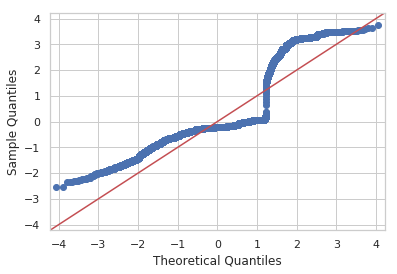

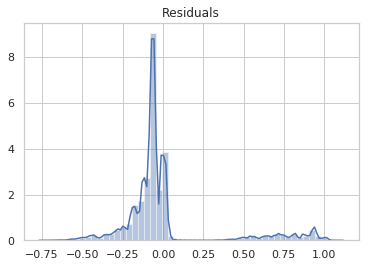

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     188.4
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        14:06:11   Log-Likelihood:                -7503.5
No. Observations:               40949   AIC:                         1.505e+04
Df Residuals:                   40930   BIC:                         1.521e+04
Df Model:                          18                                         
Covariance Type:                  HC0                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0936      0.009     10.393      0.000       0.076       0.111
contact          0.0294      0.006      5.296      0.000       0.019       0.040
campaign        -0.0035      0.000     -8.867      0.000      -0.004      -0.003
previous         0.0688      0.005     13.464      0.000       0.059       0.079
emp.var.rate    -0.0531      0.002    -25.669      0.000      -0.057      -0.049
blue-collar     -0.0238      0.003     -7.031      0.000      -0.030      -0.017
entrepreneur    -0.0173      0.007     -2.348      0.019      -0.032      -0.003
management      -0.0055      0.006     -0.945      0.345      -0.017       0.006
retired          0.0509      0.010      5.147      0.000       0.032       0.070
services        -0.0197      0.005     -4.166      0.000      -0.029      -0.010
student          0.0751      0.015      4.980      0.000       0.046       0.105
aug              0.0515      0.011      4.799      0.000       0.030       0.072
jul              0.0677      0.010      6.508      0.000       0.047       0.088
jun              0.0342      0.010      3.406      0.001       0.015       0.054
mar              0.2794      0.023     12.308      0.000       0.235       0.324
may             -0.0504      0.009     -5.821      0.000      -0.067      -0.033
nov             -0.0268      0.010     -2.808      0.005      -0.046      -0.008
oct              0.1589      0.021      7.690      0.000       0.118       0.199
sep              0.1730      0.023      7.647      0.000       0.129       0.217
==============================================================================
Omnibus:                    16022.479   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54146.902
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                       6.874   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Variance Inflation Factors:
21.134835195011743 const
2.4230593529335542 contact
1.035602184712304 campaign
1.2461663846573323 previous
2.525902975234939 emp.var.rate
1.176311232198173 blue-collar
1.0429912415669762 entrepreneur
1.0693348771898068 management
1.0610369988444968 retired
1.0977835821445638 services
1.0476733948390058 student
3.718192758459077 aug
4.160433242738336 jul
3.2062143149574265 jun
1.1978096592691139 mar
4.6599163715584835 may
2.4696254452997293 nov
1.2793457906752723 oct
1.2250455192107061 sep


In [52]:
model2 = sm.OLS(Y,X2).fit(cov_type='HC0')
sm.qqplot(model2.resid, sc.norm, fit=True, line='45')
plt.show()
sns.distplot(model2.resid)
plt.title('Residuals')
plt.show()
display(model2.summary())
print("Variance Inflation Factors:")
print_VIF(X2)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X2.values, Y.values, test_size=0.25)

reg = LinearRegression()
reg = reg.fit(X_train,Y_train)

y_hat = reg.predict(X_test)

print('Test accuracy:',np.round(reg.score(np.round(X_test), Y_test),3), ', MSE Loss is:', mean_squared_error(Y_test,y_hat))

Test accuracy: 0.145 , MSE Loss is: 0.08108139598792455


# Classification

In [54]:
def plot_hist2(df,df2,df_col):
    df = df.dropna()  
    df2 = df2.dropna() 
    for d in df_col:
        print("Empirical Distribution of Variable "+d)
        fig, axes = plt.subplots(1,2,figsize=(15,9))
        sns.distplot(df[d],ax=axes[0])
        sns.distplot(df2[d],ax=axes[1])
        axes[0].set_ylabel("Probability")
        axes[1].set_ylabel("Probability")
        plt.suptitle("Empirical Probability Distribution of Numerical Variable "+d)
        plt.show()
        
def get_num_cols(df):
    idx = df.select_dtypes(exclude='object').columns.values
    dF = df[idx].dropna() #remove NaNs or else it cant plot
    return dF.columns

def calculate_metrics(y_test,y_hat):
    c = confusion_matrix(y_test, y_hat)
    print("Confusion matrix is:")
    print(c)
    print("We have",c[0][0]+c[1][1],"correct observations and",c[0][1]+c[1][0], "misclassifications.")
    print(classification_report(y_test, y_hat))
    plt.figure(figsize=(6,6))
    sns.heatmap(c,cmap="YlGnBu",annot=True,fmt='g')
    plt.show()
    
def plot_ROC(y_test,X_test,classifier):
    roc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure(figsize=(12,12))
    plt.plot(fpr, tpr, label='Classifier area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()
    
    
def plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME):
    
    plt.figure(figsize=(12,12))
    for i in range(len(L_Y)):
        roc = roc_auc_score(L_Y[i], L_YHAT[i])
        fpr, tpr, _ = roc_curve(L_Y[i], L_PROB[i][:,1])
        plt.plot(fpr, tpr, label=L_NAME[i]+', area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()

    
    
def MAE(y_test,y_hat):
    return np.abs(y_test-y_hat).sum()#/y_test.shape[0]


## Logistic Regression with PCA

In [55]:
pcaXmodel = PCA(n_components=5, whiten=True)
pc = pcaXmodel.fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))
print(pcaXmodel.explained_variance_ratio_[:5])

proj = pcaXmodel.inverse_transform(pc)
a = pd.DataFrame(proj)[list((np.ones((31,1))-1).cumsum().ravel())]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,  random_state=0)
lr = LogisticRegression().fit(X_train,y_train)

y_hat = lr.predict(X_test)
print('Test accuracy:',np.round(lr.score(X_test, y_test),3), ', Cross Entropy Loss is:', log_loss(y_test,y_hat))
print(MAE(y_test,y_hat))

#pcaXmodel = PCA(n_components=5).fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))

[0.89682587 0.05748246 0.0204958  0.00333079 0.00236176]
Test accuracy: 0.887 , Cross Entropy Loss is: 3.905127582100686
1389


Confusion matrix is:
[[10737   165]
 [ 1224   159]]
We have 10896 correct observations and 1389 misclassifications.
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10902
           1       0.49      0.11      0.19      1383

   micro avg       0.89      0.89      0.89     12285
   macro avg       0.69      0.55      0.56     12285
weighted avg       0.85      0.89      0.85     12285



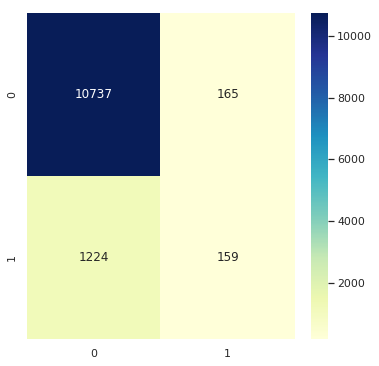

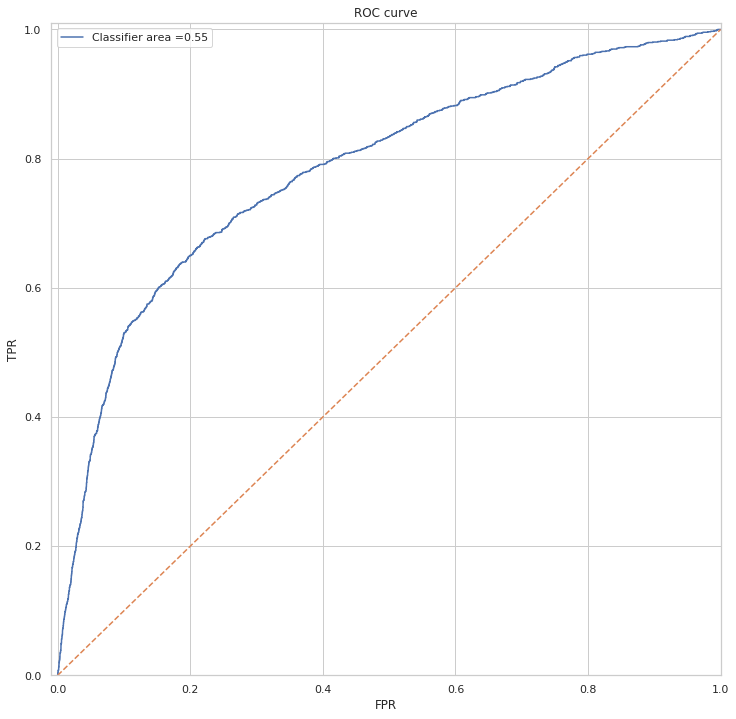

In [56]:
calculate_metrics(y_test,y_hat)
plot_ROC(y_test,X_test,lr)

In [57]:
a.shape

(40949, 31)

In [58]:
logit = sm.Logit(Y, X).fit()
display(logit.summary())    

Optimization terminated successfully.
         Current function value: 0.293562
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40949
Model:                          Logit   Df Residuals:                    40918
Method:                           MLE   Df Model:                           30
Date:                Fri, 10 May 2019   Pseudo R-squ.:                  0.1577
Time:                        14:06:12   Log-Likelihood:                -12021.
converged:                       True   LL-Null:                       -14272.
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0208      0.001    -13.966      0.000      -0.024      -0.018
housing                -0.1384      0.034     -4.108      0.000      -0.204      -0.072
loan                   -0.0677      0.048     -1.424      0.154      -0.161       0.025
contact                -0.2694      0.051     -5.239      0.000      -0.370      -0.169
campaign               -0.0805      0.010     -8.272      0.000      -0.100      -0.061
previous                0.3956      0.026     15.024      0.000       0.344       0.447
emp.var.rate           -0.4211      0.014    -31.187      0.000      -0.448      -0.395
blue-collar            -0.6715      0.060    -11.141      0.000      -0.790      -0.553
entrepreneur           -0.3916      0.105     -3.731      0.000      -0.597      -0.186
housemaid              -0.3927      0.121     -3.249      0.001      -0.630      -0.156
management             -0.2096      0.072     -2.903      0.004      -0.351      -0.068
retired                 0.4508      0.089      5.043      0.000       0.276       0.626
self-employed          -0.3553      0.099     -3.579      0.000      -0.550      -0.161
services               -0.4390      0.071     -6.214      0.000      -0.577      -0.301
student                -0.0562      0.089     -0.630      0.529      -0.231       0.119
technician             -0.2691      0.058     -4.633      0.000      -0.383      -0.155
unemployed             -0.2013      0.106     -1.902      0.057      -0.409       0.006
married                -0.0648      0.037     -1.746      0.081      -0.138       0.008
basic.6y               -0.4636      0.091     -5.101      0.000      -0.642      -0.285
basic.9y               -0.6431      0.067     -9.652      0.000      -0.774      -0.512
high.school            -0.7244      0.059    -12.370      0.000      -0.839      -0.610
professional.course    -0.5780      0.071     -8.130      0.000      -0.717      -0.439
university.degree      -0.6507      0.056    -11.619      0.000      -0.760      -0.541
aug                    -0.2108      0.065     -3.234      0.001      -0.338      -0.083
jul                     0.0587      0.066      0.890      0.373      -0.071       0.188
jun                    -0.0449      0.069     -0.655      0.512      -0.179       0.089
mar                     0.9619      0.098      9.778      0.000       0.769       1.155
may                    -0.9716      0.056    -17.424      0.000      -1.081      -0.862
nov                    -0.6523      0.070     -9.367      0.000      -0.789      -0.516
oct                     0.2948      0.093      3.183      0.001       0.113       0.476
sep                     0.4243      0.100      4.253      0.000       0.229       0.620
=======================================================================================
"""

In [59]:
sns.set_style('whitegrid')
alpha = 0.05
a = logit.pvalues < alpha

X3 = X[X.columns[a]]
print("Not Statistically significant regressors are:")
print(list(X.columns[~a]))

Not Statistically significant regressors are:
['loan', 'student', 'unemployed', 'married', 'jul', 'jun']


Optimization terminated successfully.
         Current function value: 0.293698
         Iterations 7


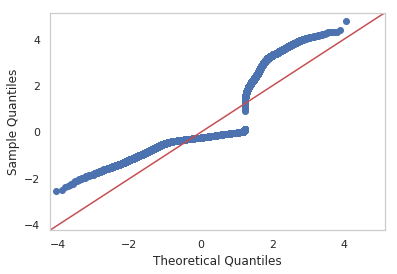

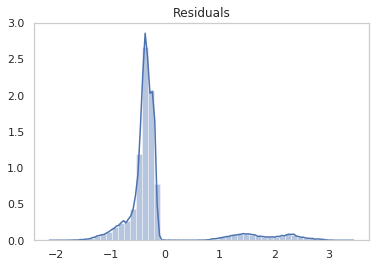

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40949
Model:                          Logit   Df Residuals:                    40924
Method:                           MLE   Df Model:                           24
Date:                Fri, 10 May 2019   Pseudo R-squ.:                  0.1573
Time:                        14:06:12   Log-Likelihood:                -12027.
converged:                       True   LL-Null:                       -14272.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0219      0.001    -16.668      0.000      -0.024      -0.019
x2            -0.1418      0.034     -4.226      0.000      -0.208      -0.076
x3            -0.3036      0.047     -6.481      0.000      -0.395      -0.212
x4            -0.0805      0.010     -8.349      0.000      -0.099      -0.062
x5             0.3958      0.026     15.082      0.000       0.344       0.447
x6            -0.4135      0.012    -34.306      0.000      -0.437      -0.390
x7            -0.6559      0.058    -11.275      0.000      -0.770      -0.542
x8            -0.3819      0.104     -3.668      0.000      -0.586      -0.178
x9            -0.3692      0.120     -3.084      0.002      -0.604      -0.135
x10           -0.2024      0.071     -2.842      0.004      -0.342      -0.063
x11            0.4948      0.088      5.640      0.000       0.323       0.667
x12           -0.3397      0.099     -3.446      0.001      -0.533      -0.146
x13           -0.4211      0.069     -6.071      0.000      -0.557      -0.285
x14           -0.2481      0.057     -4.384      0.000      -0.359      -0.137
x15           -0.4730      0.090     -5.268      0.000      -0.649      -0.297
x16           -0.6526      0.065    -10.086      0.000      -0.779      -0.526
x17           -0.7189      0.055    -13.006      0.000      -0.827      -0.611
x18           -0.5823      0.069     -8.402      0.000      -0.718      -0.446
x19           -0.6397      0.053    -12.089      0.000      -0.743      -0.536
x20           -0.2317      0.054     -4.328      0.000      -0.337      -0.127
x21            0.9615      0.093     10.315      0.000       0.779       1.144
x22           -0.9750      0.045    -21.635      0.000      -1.063      -0.887
x23           -0.6670      0.061    -10.973      0.000      -0.786      -0.548
x24            0.2965      0.088      3.378      0.001       0.124       0.469
x25            0.4162      0.095      4.400      0.000       0.231       0.602
==============================================================================
"""

Variance Inflation Factors:
10.59285135212034 age
2.1189581199142262 housing
2.5784705320747205 contact
1.9652236412758264 campaign
1.3877212802827528 previous
1.8225304898784933 emp.var.rate
2.348372356176547 blue-collar
1.14163524129405 entrepreneur
1.1512800634732347 housemaid
1.2940384604988566 management
1.4834937610887158 retired
1.1261108332839098 self-employed
1.4471899518339966 services
1.902603411017963 technician
1.3953800724789436 basic.6y
2.0079977473739965 basic.9y
2.6741950884656536 high.school
2.297931584308367 professional.course
3.3016071127980133 university.degree
1.6385893838857952 aug
1.0728676709603513 mar
2.2099886621689033 may
1.3450595960370224 nov
1.1412686812851054 oct
1.1068452368839075 sep


In [60]:
model2 = sm.Logit(Y.values,X3.values).fit()
sm.qqplot(model2.resid_dev, sc.norm, fit=True, line='45')
plt.grid()
plt.show()
sns.distplot(model2.resid_dev)
plt.title('Residuals')
plt.grid()
plt.show()
display(model2.summary())
print("Variance Inflation Factors:")
print_VIF(X3)

In [61]:
logit = sm.Logit(Y.values, pc).fit()
display(logit.summary()) 

Optimization terminated successfully.
         Current function value: 0.673024
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40949
Model:                          Logit   Df Residuals:                    40944
Method:                           MLE   Df Model:                            4
Date:                Fri, 10 May 2019   Pseudo R-squ.:                 -0.9310
Time:                        14:06:14   Log-Likelihood:                -27560.
converged:                       True   LL-Null:                       -14272.
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0352      0.010      3.449      0.001       0.015       0.055
x2            -0.1188      0.010    -11.713      0.000      -0.139      -0.099
x3             0.3641      0.010     35.551      0.000       0.344       0.384
x4            -0.1408      0.010    -13.967      0.000      -0.161      -0.121
x5            -0.0248      0.010     -2.464      0.014      -0.044      -0.005
==============================================================================
"""

### AdaBoost Classifier

Test accuracy: 0.886 , Cross Entropy Loss is: 3.9276229223650616
Confusion matrix is:
[[32074   664]
 [ 3527   590]]
We have 32664 correct observations and 4191 misclassifications.
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     32738
           1       0.47      0.14      0.22      4117

   micro avg       0.89      0.89      0.89     36855
   macro avg       0.69      0.56      0.58     36855
weighted avg       0.85      0.89      0.86     36855



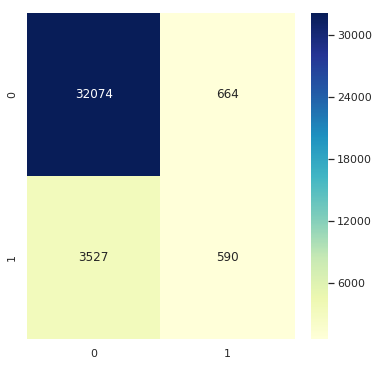

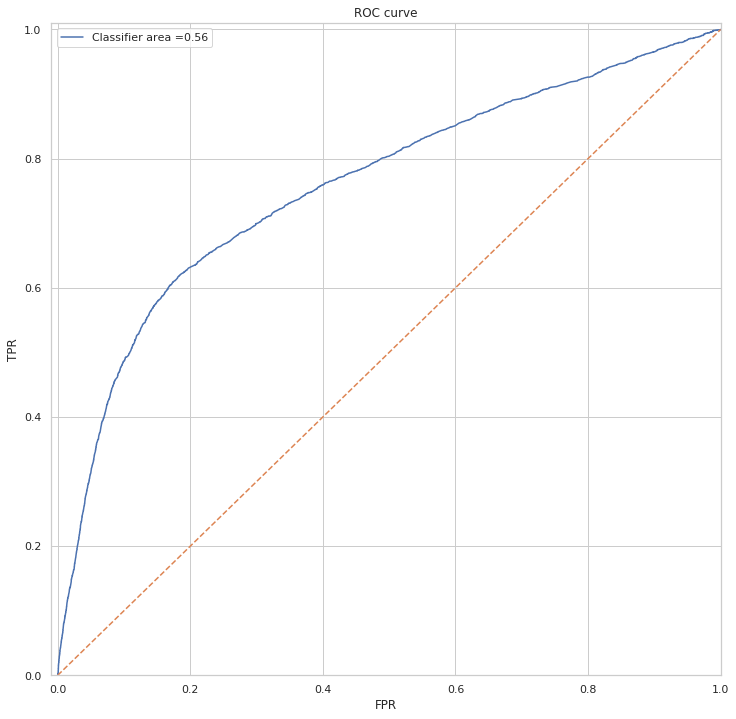

4191

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.9)

clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)
MAE(Y_test,y_hat)

### SVC 

# Unbalanced Data Problem

In [63]:
sns.set_style('whitegrid')

In [64]:
def make_balanced(X,Y):
    DF = X.copy()
    DF['Y'] = Y
    DF_Yes = DF[DF.Y==1]#.info()
    DF_No = DF[DF.Y==0]#.info()
    DF_B = DF_No.sample(len(DF_Yes))
    D = pd.concat([DF_B,DF_Yes])
    D = D.reindex(np.random.permutation(D.index))
    D = D[:int(len(D)/2)]#, D[int(len(D)/2):]
    return D

In [65]:
D = make_balanced(X,Y)

In [66]:
D.shape

(4544, 32)

In [67]:
X_B = D.drop(columns='Y')
Y_B = D['Y']

Test accuracy: 0.729 , Cross Entropy Loss is: 9.364452017775967
Confusion matrix is:
[[477  93]
 [215 351]]
We have 828 correct observations and 308 misclassifications.
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       570
           1       0.79      0.62      0.70       566

   micro avg       0.73      0.73      0.73      1136
   macro avg       0.74      0.73      0.73      1136
weighted avg       0.74      0.73      0.73      1136



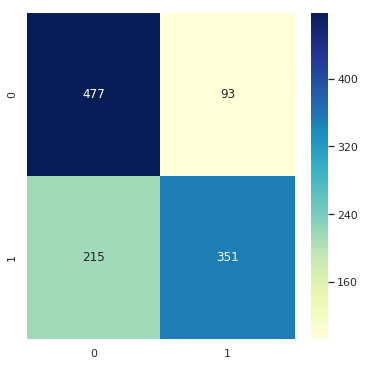

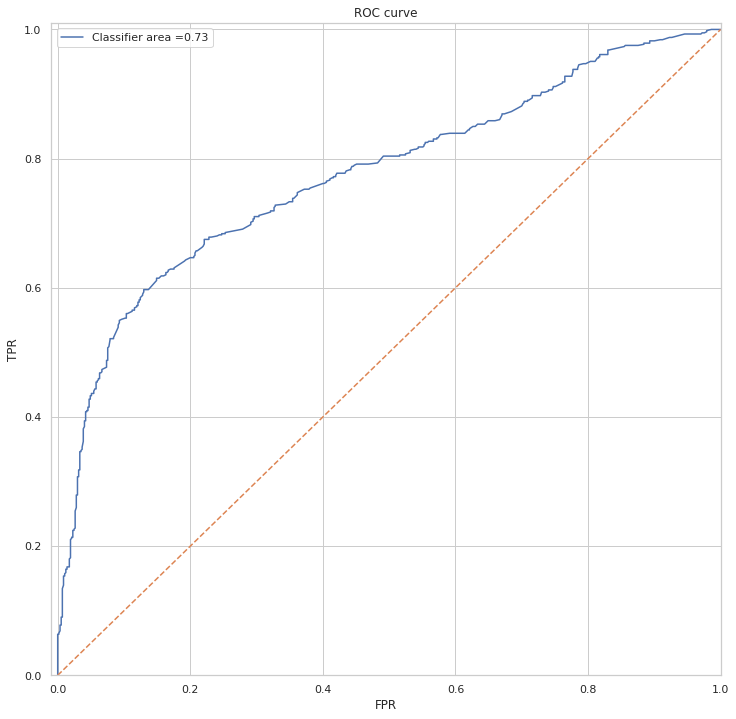

308

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_B.values, Y_B.values, test_size=0.25)
clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)
MAE(Y_test,y_hat)

In [69]:
X_R = X.drop(D.index)
Y_R = Y.drop(D.index)

In [70]:
C = [LogisticRegression(), AdaBoostClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

def calc_sampling_imb(X,Y):
    L_NAME = ['lr','ada','knn','rforest']
    L_X, L_Y, L_YHAT, L_PROB = [],[],[],[]

    for cl in C:   
        y_hat = cross_val_predict(cl, X, Y, cv=10, n_jobs=-1)
        probs = cross_val_predict(cl, X, Y, cv=10, method='predict_proba',n_jobs=-1)

        #print('Test accuracy:',np.round(c.score(X_R, Y_R),3), ', Cross Entropy Loss is:', log_loss(Y_R,y_hat))
        calculate_metrics(Y,y_hat)
        #plot_ROC(Y_R,X,c)
        print('MAE:',MAE(Y,y_hat))

                        #L_NAME.append(name)
        L_X.append(X.values)
        L_Y.append(Y.values)
        L_YHAT.append(y_hat)
        L_PROB.append(probs)

    plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)

    #plot_ROC3(L_Y,L_X,L_CLASS,L_NAME)


Confusion matrix is:
[[30064  4050]
 [ 2101   190]]
We have 30254 correct observations and 6151 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     34114
           1       0.04      0.08      0.06      2291

   micro avg       0.83      0.83      0.83     36405
   macro avg       0.49      0.48      0.48     36405
weighted avg       0.88      0.83      0.85     36405



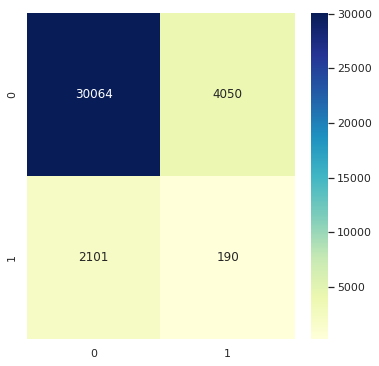

MAE: 6151
Confusion matrix is:
[[32027  2087]
 [ 2131   160]]
We have 32187 correct observations and 4218 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     34114
           1       0.07      0.07      0.07      2291

   micro avg       0.88      0.88      0.88     36405
   macro avg       0.50      0.50      0.50     36405
weighted avg       0.88      0.88      0.88     36405



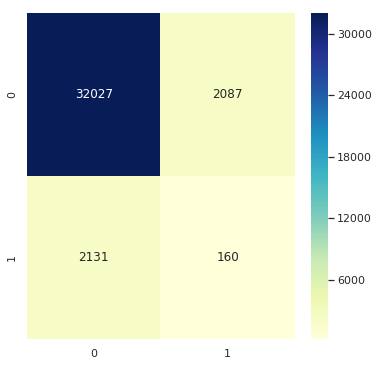

MAE: 4218
Confusion matrix is:
[[32049  2065]
 [ 2179   112]]
We have 32161 correct observations and 4244 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     34114
           1       0.05      0.05      0.05      2291

   micro avg       0.88      0.88      0.88     36405
   macro avg       0.49      0.49      0.49     36405
weighted avg       0.88      0.88      0.88     36405



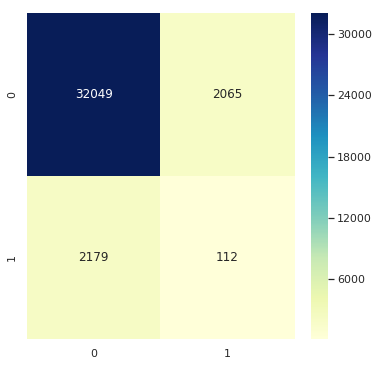

MAE: 4244
Confusion matrix is:
[[29448  4666]
 [ 2078   213]]
We have 29661 correct observations and 6744 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.86      0.90     34114
           1       0.04      0.09      0.06      2291

   micro avg       0.81      0.81      0.81     36405
   macro avg       0.49      0.48      0.48     36405
weighted avg       0.88      0.81      0.84     36405



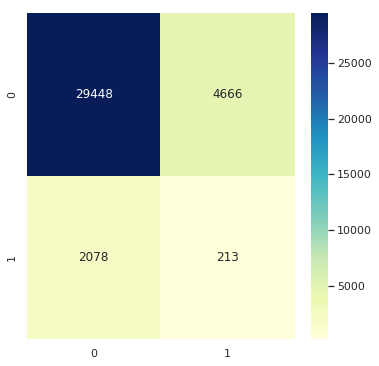

MAE: 6744


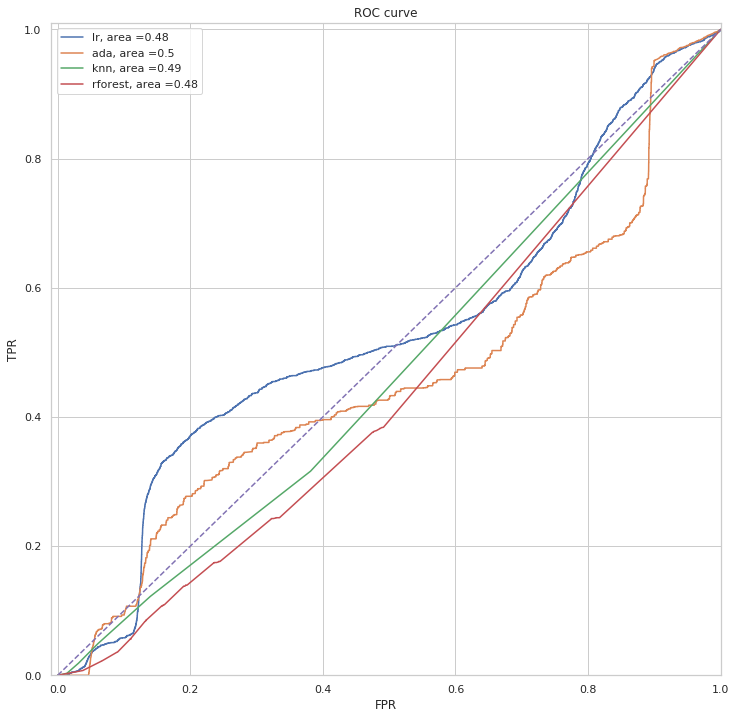

In [71]:
calc_sampling_imb(X_R,Y_R)

In [72]:
def train_B_test(X,Y):
    L_NAME = ['lr','ada','knn','rforest']
    L_X, L_Y, L_YHAT, L_PROB = [],[],[],[]
    
    D = make_balanced(X,Y)
    X_B = D.drop(columns='Y')
    Y_B = D['Y']
    
    X_R = X.drop(D.index)
    Y_R = Y.drop(D.index)
    
    for i,cl in enumerate(C):
    
        c = cl.fit(X_B,Y_B)
        y_hat = c.predict(X_R)
        probs = c.predict_proba(X_R)
        print(L_NAME[i])
        print('Test accuracy:',np.round(c.score(X_R, Y_R),3), ', Cross Entropy Loss is:', log_loss(Y_R,y_hat))
        calculate_metrics(Y_R,y_hat)
        MAE(Y_R,y_hat)

        L_X.append(X_R.values)
        L_Y.append(Y_R.values)
        L_YHAT.append(y_hat)
        L_PROB.append(probs)

    plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)

lr
Test accuracy: 0.797 , Cross Entropy Loss is: 6.995183247290505
Confusion matrix is:
[[27531  6563]
 [  810  1501]]
We have 29032 correct observations and 7373 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     34094
           1       0.19      0.65      0.29      2311

   micro avg       0.80      0.80      0.80     36405
   macro avg       0.58      0.73      0.59     36405
weighted avg       0.92      0.80      0.84     36405



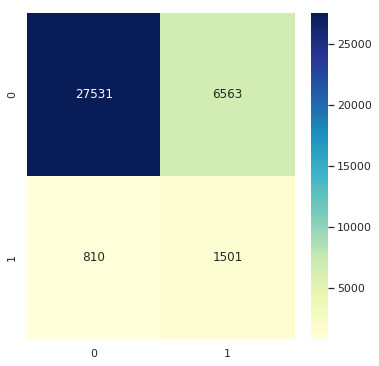

ada
Test accuracy: 0.827 , Cross Entropy Loss is: 5.971470810230238
Confusion matrix is:
[[28671  5423]
 [  871  1440]]
We have 30111 correct observations and 6294 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     34094
           1       0.21      0.62      0.31      2311

   micro avg       0.83      0.83      0.83     36405
   macro avg       0.59      0.73      0.61     36405
weighted avg       0.92      0.83      0.86     36405



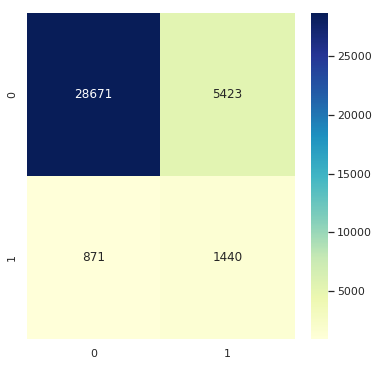

knn
Test accuracy: 0.71 , Cross Entropy Loss is: 9.999902631491398
Confusion matrix is:
[[24399  9695]
 [  845  1466]]
We have 25865 correct observations and 10540 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     34094
           1       0.13      0.63      0.22      2311

   micro avg       0.71      0.71      0.71     36405
   macro avg       0.55      0.67      0.52     36405
weighted avg       0.91      0.71      0.78     36405



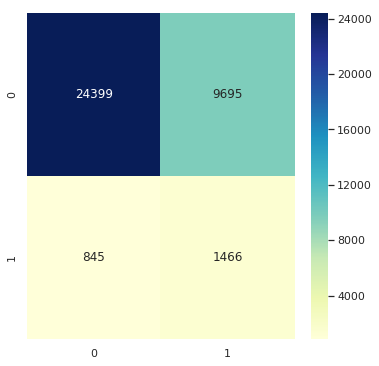

rforest
Test accuracy: 0.737 , Cross Entropy Loss is: 9.069168676662667
Confusion matrix is:
[[25437  8657]
 [  902  1409]]
We have 26846 correct observations and 9559 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     34094
           1       0.14      0.61      0.23      2311

   micro avg       0.74      0.74      0.74     36405
   macro avg       0.55      0.68      0.53     36405
weighted avg       0.91      0.74      0.80     36405



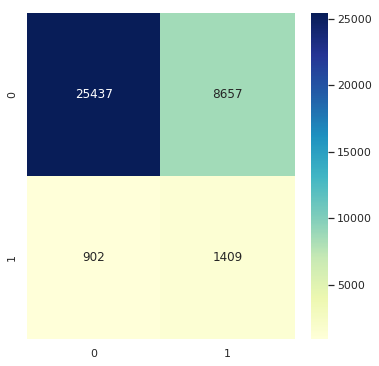

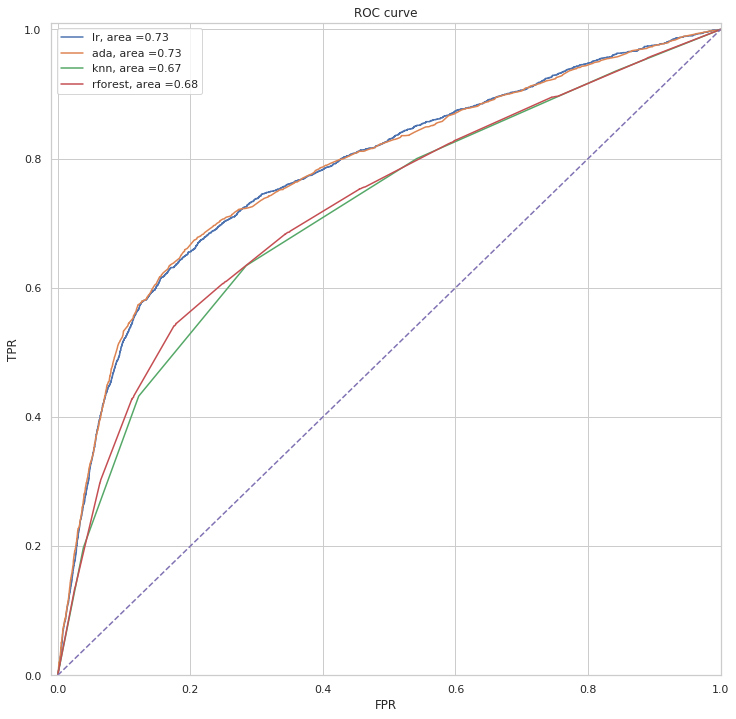

In [73]:
train_B_test(X,Y)

## Test Over/Under Sampling Methods

In [74]:
sns.set_style('whitegrid')

In [96]:
def calc_performance(c,name):

    classifier = [name, c]

    over_samplers = [
        #['ADA-SYN', ADASYN()],
        ['ROS', RandomOverSampler()],
        ['RUS', RandomUnderSampler()],
        #['SMOTENC', SMOTENC()],
        ['SMOTEENN', SMOTEENN()],
        ['ENN', EditedNearestNeighbours()],
    ]

    pipelines = [
        ['{}-{}'.format(s[0], classifier[0]),
         make_pipeline(s[1], classifier[1])]
        for s in over_samplers
    ]


    calc_sampling(pipelines,X,Y)


def calc_sampling(pipelines,X,Y):
    L_NAME, L_X, L_Y, L_YHAT, L_PROB = [],[],[],[],[]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.85)
    for name, pipeline in pipelines:
        
        p = pipeline.fit(X_train,Y_train)
        y_hat = p.predict(X_test)
        probs = p.predict_proba(X_test)
        calculate_metrics(Y_test,y_hat)

        L_NAME.append(name)
        L_X.append(X_test)
        L_Y.append(Y_test)
        L_YHAT.append(y_hat)
        L_PROB.append(probs)
   
    plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)



Confusion matrix is:
[[24535  6421]
 [ 1372  2479]]
We have 27014 correct observations and 7793 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     30956
           1       0.28      0.64      0.39      3851

   micro avg       0.78      0.78      0.78     34807
   macro avg       0.61      0.72      0.63     34807
weighted avg       0.87      0.78      0.81     34807



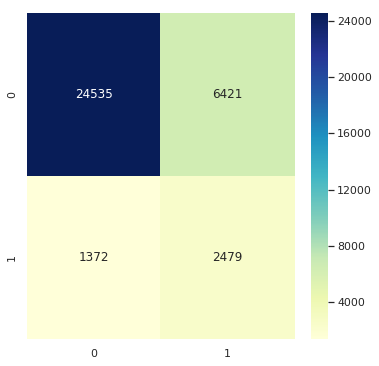

Confusion matrix is:
[[23994  6962]
 [ 1293  2558]]
We have 26552 correct observations and 8255 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.78      0.85     30956
           1       0.27      0.66      0.38      3851

   micro avg       0.76      0.76      0.76     34807
   macro avg       0.61      0.72      0.62     34807
weighted avg       0.87      0.76      0.80     34807



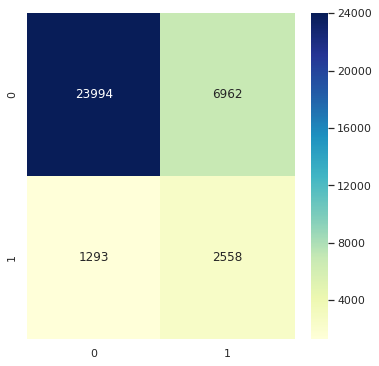

Confusion matrix is:
[[19637 11319]
 [  969  2882]]
We have 22519 correct observations and 12288 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     30956
           1       0.20      0.75      0.32      3851

   micro avg       0.65      0.65      0.65     34807
   macro avg       0.58      0.69      0.54     34807
weighted avg       0.87      0.65      0.71     34807



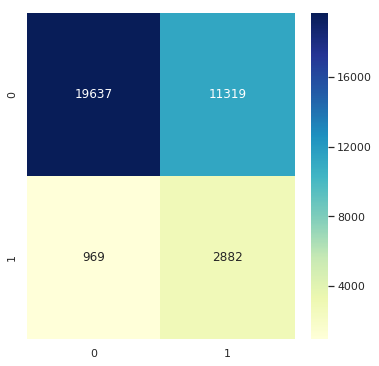

Confusion matrix is:
[[28834  2122]
 [ 2218  1633]]
We have 30467 correct observations and 4340 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     30956
           1       0.43      0.42      0.43      3851

   micro avg       0.88      0.88      0.88     34807
   macro avg       0.68      0.68      0.68     34807
weighted avg       0.87      0.88      0.87     34807



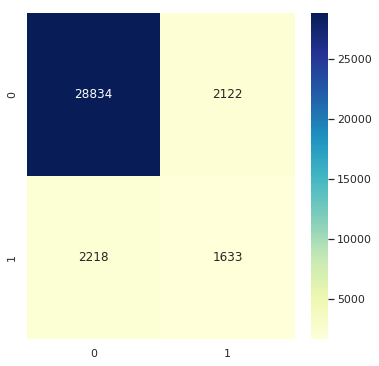

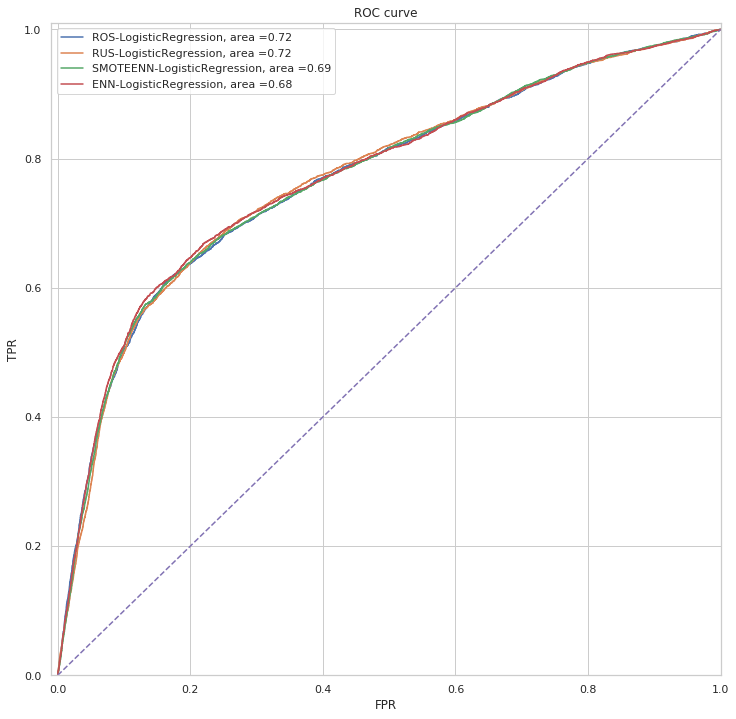

Confusion matrix is:
[[24417  6545]
 [ 1323  2522]]
We have 26939 correct observations and 7868 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     30962
           1       0.28      0.66      0.39      3845

   micro avg       0.77      0.77      0.77     34807
   macro avg       0.61      0.72      0.63     34807
weighted avg       0.87      0.77      0.81     34807



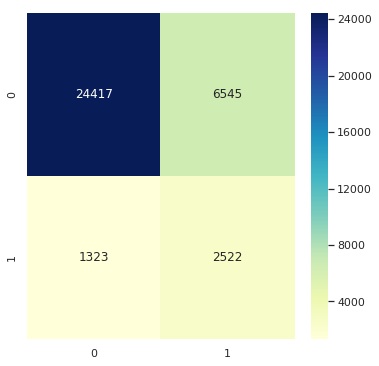

Confusion matrix is:
[[23937  7025]
 [ 1380  2465]]
We have 26402 correct observations and 8405 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     30962
           1       0.26      0.64      0.37      3845

   micro avg       0.76      0.76      0.76     34807
   macro avg       0.60      0.71      0.61     34807
weighted avg       0.87      0.76      0.80     34807



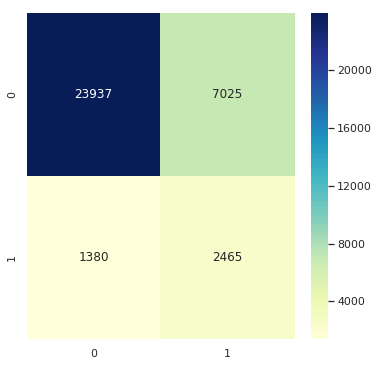

Confusion matrix is:
[[25787  5175]
 [ 1521  2324]]
We have 28111 correct observations and 6696 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.83      0.89     30962
           1       0.31      0.60      0.41      3845

   micro avg       0.81      0.81      0.81     34807
   macro avg       0.63      0.72      0.65     34807
weighted avg       0.87      0.81      0.83     34807



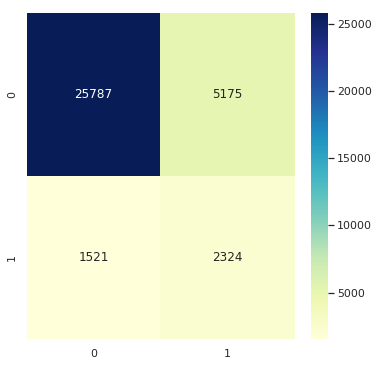

Confusion matrix is:
[[28720  2242]
 [ 2162  1683]]
We have 30403 correct observations and 4404 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     30962
           1       0.43      0.44      0.43      3845

   micro avg       0.87      0.87      0.87     34807
   macro avg       0.68      0.68      0.68     34807
weighted avg       0.87      0.87      0.87     34807



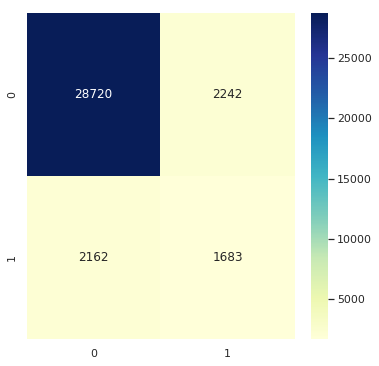

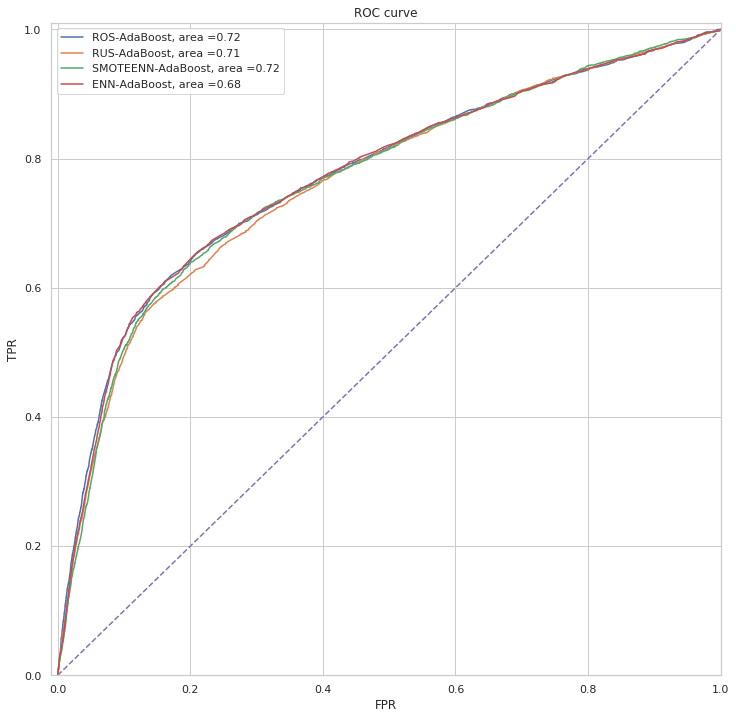

Confusion matrix is:
[[23602  7356]
 [ 1930  1919]]
We have 25521 correct observations and 9286 misclassifications.
              precision    recall  f1-score   support

           0       0.92      0.76      0.84     30958
           1       0.21      0.50      0.29      3849

   micro avg       0.73      0.73      0.73     34807
   macro avg       0.57      0.63      0.56     34807
weighted avg       0.85      0.73      0.78     34807



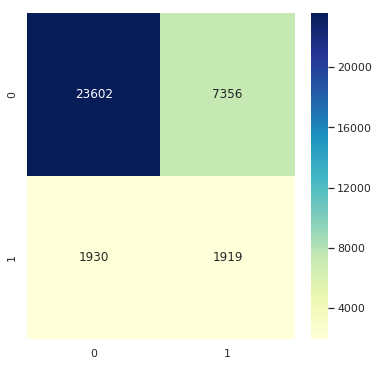

Confusion matrix is:
[[21674  9284]
 [ 1446  2403]]
We have 24077 correct observations and 10730 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     30958
           1       0.21      0.62      0.31      3849

   micro avg       0.69      0.69      0.69     34807
   macro avg       0.57      0.66      0.56     34807
weighted avg       0.86      0.69      0.75     34807



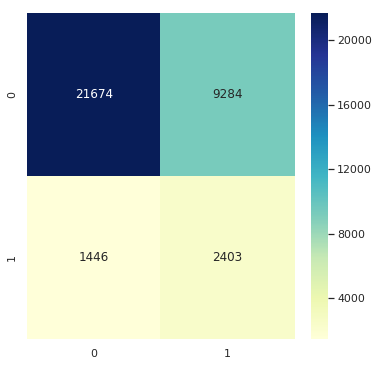

Confusion matrix is:
[[18137 12821]
 [ 1107  2742]]
We have 20879 correct observations and 13928 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.59      0.72     30958
           1       0.18      0.71      0.28      3849

   micro avg       0.60      0.60      0.60     34807
   macro avg       0.56      0.65      0.50     34807
weighted avg       0.86      0.60      0.67     34807



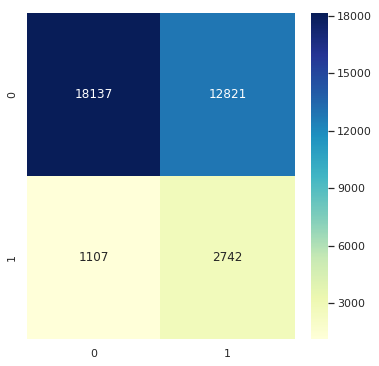

Confusion matrix is:
[[28798  2160]
 [ 2626  1223]]
We have 30021 correct observations and 4786 misclassifications.
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     30958
           1       0.36      0.32      0.34      3849

   micro avg       0.86      0.86      0.86     34807
   macro avg       0.64      0.62      0.63     34807
weighted avg       0.86      0.86      0.86     34807



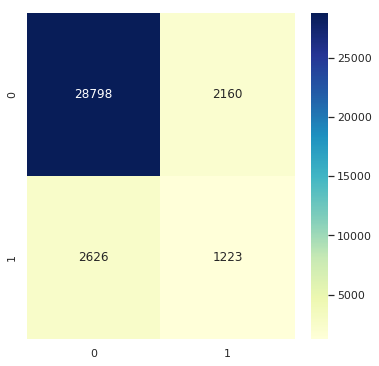

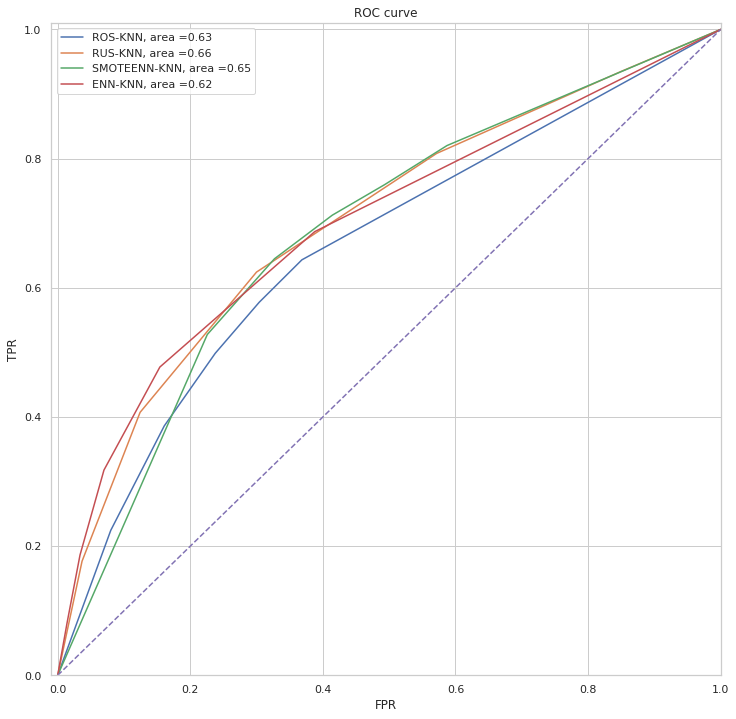

Confusion matrix is:
[[29043  1899]
 [ 2776  1089]]
We have 30132 correct observations and 4675 misclassifications.
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     30942
           1       0.36      0.28      0.32      3865

   micro avg       0.87      0.87      0.87     34807
   macro avg       0.64      0.61      0.62     34807
weighted avg       0.85      0.87      0.86     34807



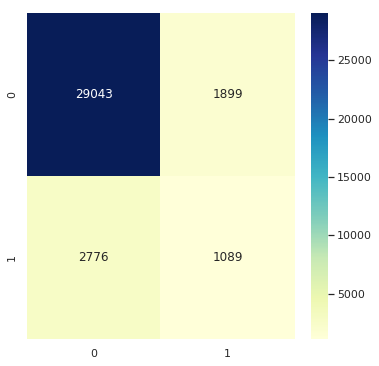

Confusion matrix is:
[[22726  8216]
 [ 1438  2427]]
We have 25153 correct observations and 9654 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     30942
           1       0.23      0.63      0.33      3865

   micro avg       0.72      0.72      0.72     34807
   macro avg       0.58      0.68      0.58     34807
weighted avg       0.86      0.72      0.77     34807



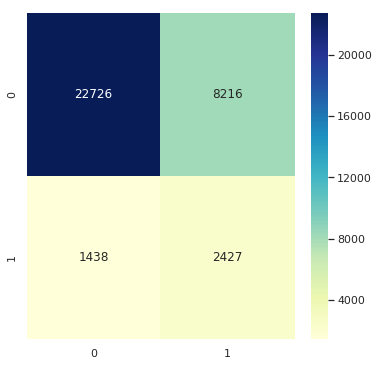

Confusion matrix is:
[[27213  3729]
 [ 1939  1926]]
We have 29139 correct observations and 5668 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     30942
           1       0.34      0.50      0.40      3865

   micro avg       0.84      0.84      0.84     34807
   macro avg       0.64      0.69      0.66     34807
weighted avg       0.87      0.84      0.85     34807



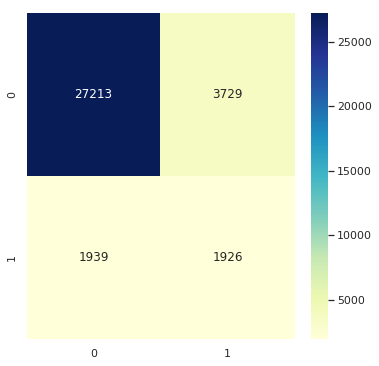

Confusion matrix is:
[[28494  2448]
 [ 2278  1587]]
We have 30081 correct observations and 4726 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     30942
           1       0.39      0.41      0.40      3865

   micro avg       0.86      0.86      0.86     34807
   macro avg       0.66      0.67      0.66     34807
weighted avg       0.87      0.86      0.87     34807



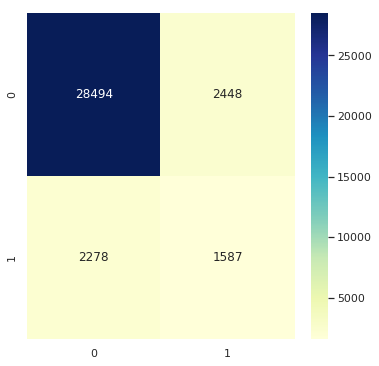

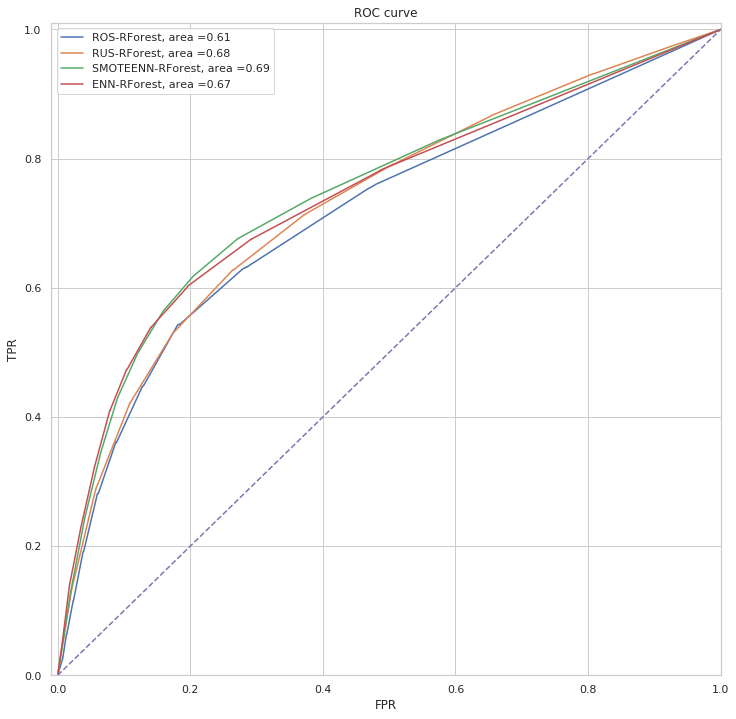

In [97]:
NAME = ['LogisticRegression','AdaBoost','KNN','RForest']
C_dict = dict(zip(NAME,C))

for name,c in C_dict.items():
    calc_performance(c,name)

## selection of relevant variables from balanced dataset

In [86]:
L, Counts,Coeffs = [],[],[]
for i in range(1000):
    D = make_balanced(X,Y)
    X_B = D.drop(columns='Y')
    Y_B = D['Y']
    
    X_B = sm.add_constant(X_B)

    logit = sm.Logit(Y_B, X_B).fit(disp=0)
    #display(logit.summary())  

    alpha = 0.10
    a = logit.pvalues < alpha

    X4 = X_B[X_B.columns[a]]
    #print("Not Statistically significant regressors are:")
    temp = list(X_B.columns[a])
    L.append(temp)
    Counts.append(len(temp))
    Coeffs.append(logit.params.loc[temp])


In [87]:
L = [y for x in L for y in x]

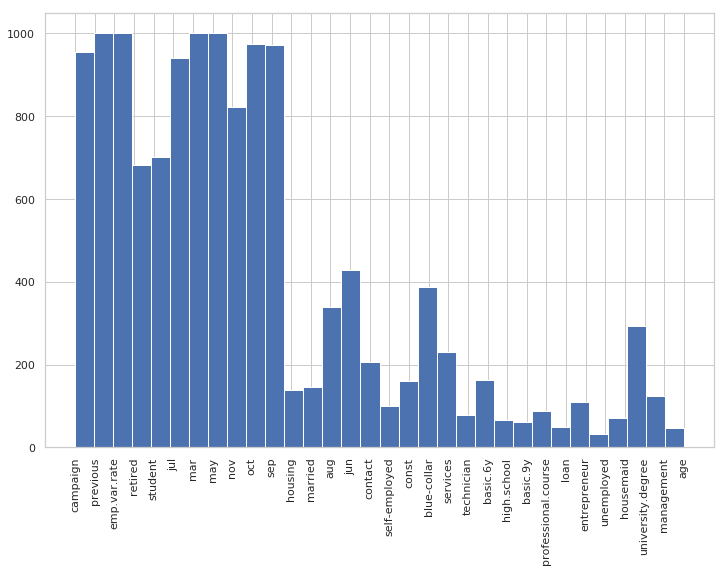

In [88]:
plt.figure(figsize=(12,8))
plt.hist(L,bins=len(set(L)))
plt.xticks(rotation=90)
plt.show()

In [89]:
from collections import Counter
d = Counter(L)

import operator
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1), reverse=True))

In [90]:
TopVars = []
print('Most frequently significant variables:')
for i, (k,v) in enumerate(sorted_d.items()):
    if v > 500:
        print(k, ':',v)
        TopVars.append(k)
        

Most frequently significant variables:
previous : 1000
emp.var.rate : 1000
mar : 1000
may : 1000
oct : 974
sep : 972
campaign : 954
jul : 940
nov : 822
student : 702
retired : 683


In [91]:
V = []
for v in TopVars:
    summ = 0
    count = 0
    for c in Coeffs:
        try:
            summ += c.loc[v]
            count +=1
        except KeyError:
            pass
    V.append(summ/count)

In [92]:
list(np.round(np.array(V),3))

[0.348, -0.481, 1.32, -0.601, 0.881, 0.88, -0.049, 0.495, -0.425, 0.578, 0.493]

In [93]:
list(np.round(np.exp(np.array(V)),3))

[1.417, 0.618, 3.742, 0.548, 2.413, 2.412, 0.952, 1.641, 0.654, 1.782, 1.637]